In [257]:
!ls ../experiments/corr_time

darts_pt_0.txt	disc-zc-2.txt	 post_disc_3.txt  tenas_1.txt  zc-3.txt
darts_pt_1.txt	disc-zc-3.txt	 post_pt_0.txt	  tenas_2.txt  zcpt.txt
darts_pt_2.txt	disczc.txt	 post_pt_1.txt	  tenas_3.txt
darts_pt_3.txt	post_disc_0.txt  post_pt_2.txt	  zc-0.txt
disc-zc-0.txt	post_disc_1.txt  post_pt_3.txt	  zc-1.txt
disc-zc-1.txt	post_disc_2.txt  tenas_0.txt	  zc-2.txt


In [258]:
import os
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pathlib

In [259]:
def parse_valid_acc(l):
    return float(l.split()[3])

In [260]:
def parse_zc(l):
    zcs = []
    ls = l.split()
    #print(l)
    for ll in ls[2:]:
        v = float(ll.strip('[,]'))
        zcs.append(v)
    return zcs
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [261]:
d = '../experiments/corr_time'
seeds_tenas = []
for fname in ['tenas_0.txt','tenas_1.txt','tenas_2.txt','tenas_3.txt']:
    f = os.path.join(d,fname)

    res_tenas = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l:
            #print(l, end='')
            sc = parse_zc(l)
            sc = chunks(sc, 5)
            #print(sc)
            for x in sc:
                res_tenas[curr_iter].append(x)
                curr_edge+=1
            print(curr_iter,curr_edge)
            if curr_edge == 6-curr_iter:
                #print('inside', curr_iter)
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 6:
                    break
                res_tenas.append([])
    seeds_tenas.append(res_tenas)
for x in seeds_tenas:
    for n in x:
        print(n, '\n')

0 6
1 5
2 4
3 3
4 2
5 1
0 6
1 5
2 4
3 3
4 2
5 1
0 6
1 5
2 4
3 3
4 2
5 1
0 6
1 5
2 4
3 3
4 2
5 1
[[29.0, 51.0, 21.5, 19.0, 47.0], [29.0, 8.5, 31.5, 23.0, 31.0], [22.5, 20.5, 38.0, 25.0, 19.0], [30.0, 45.0, 40.5, 32.0, 41.0], [40.0, 30.0, 31.0, 33.0, 32.0], [33.0, 10.0, 31.5, 37.5, 18.0]] 

[[8.0, 42.0, 39.0, 33.0, 26.0], [34.0, 33.0, 34.0, 11.5, 20.5], [27.5, 13.5, 31.5, 14.0, 32.0], [26.5, 34.0, 8.0, 16.0, 28.0], [21.0, 24.0, 35.5, 19.5, 13.0]] 

[[32.0, 17.5, 17.0, 21.0, 16.0], [20.0, 4.0, 13.0, 21.5, 24.0], [8.0, 24.5, 8.0, 21.0, 17.0], [23.0, 22.5, 38.0, 30.0, 22.0]] 

[[14.0, 16.0, 20.0, 22.0, 9.0], [15.0, 4.0, 14.0, 5.0, 22.0], [20.0, 12.0, 19.0, 19.0, 14.0]] 

[[14.0, 9.0, 3.0, 10.0, 9.0], [12.0, 14.0, 9.0, 12.0, 8.0]] 

[[6.0, 2.0, 8.0, 7.0, 2.0]] 

[[42.0, 50.0, 19.0, 41.0, 29.5], [18.0, 4.0, 36.0, 16.0, 57.0], [16.5, 47.0, 36.0, 24.0, 21.0], [31.0, 31.0, 46.0, 19.0, 50.0], [13.5, 33.0, 14.5, 23.0, 34.0], [14.0, 57.0, 29.0, 27.0, 21.0]] 

[[37.0, 11.0, 20.0, 11.0, 20.5], [16.5,

In [262]:
d = '../experiments/corr_time/'

seeds_dartspt = []
for fname in ['darts_pt_0.txt','darts_pt_1.txt','darts_pt_2.txt','darts_pt_3.txt']:
    f = os.path.join(d,fname)

    res_dartspt = [[]]

    start_parse = False
    curr_op = 0
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if 'project' in l:
            start_parse = True

        if start_parse and 'valid_acc' in l:
            vacc = parse_valid_acc(l)
            print(curr_iter,curr_edge,curr_op,vacc)
            if curr_op == 0:
                res_dartspt[curr_iter].append([])
            res_dartspt[curr_iter][curr_edge].append(vacc)
            curr_op += 1
            if curr_op == 5:
                curr_edge += 1
                curr_op = 0
            if curr_edge == 6-curr_iter:
                curr_iter += 1
                if curr_iter == 6:
                    break
                res_dartspt.append([])
                curr_edge = 0 #curr_edge
                curr_op = 0
                start_parse = False
    seeds_dartspt.append(res_dartspt)


0 0 0 85.636002
0 0 1 12.372
0 0 2 76.888
0 0 3 57.067997
0 0 4 85.748001
0 1 0 85.643997
0 1 1 32.804001
0 1 2 83.283997
0 1 3 80.304001
0 1 4 85.855995
0 2 0 85.559998
0 2 1 82.792
0 2 2 83.916
0 2 3 79.503998
0 2 4 85.720001
0 3 0 85.807999
0 3 1 10.875999
0 3 2 77.279999
0 3 3 55.267998
0 3 4 85.607994
0 4 0 85.391998
0 4 1 49.995998
0 4 2 79.587997
0 4 3 79.783997
0 4 4 85.568001
0 5 0 85.671997
0 5 1 45.335999
0 5 2 77.835999
0 5 3 72.776001
0 5 4 85.743996
1 0 0 81.028
1 0 1 46.691998
1 0 2 77.711998
1 0 3 71.615997
1 0 4 81.419998
1 1 0 81.335999
1 1 1 78.307999
1 1 2 80.167999
1 1 3 77.103996
1 1 4 81.267998
1 2 0 81.075996
1 2 1 12.427999
1 2 2 71.423996
1 2 3 40.112
1 2 4 81.307999
1 3 0 81.400002
1 3 1 12.575999
1 3 2 70.984001
1 3 3 73.939995
1 3 4 81.187996
1 4 0 81.071999
1 4 1 61.119999
1 4 2 70.675995
1 4 3 58.396
1 4 4 81.512001
2 0 0 80.811996
2 0 1 80.152
2 0 2 78.888
2 0 3 68.667999
2 0 4 80.875999
2 1 0 80.851997
2 1 1 11.384
2 1 2 70.012001
2 1 3 28.983999
2 1 4 

In [263]:
def parse_zc(l):
    zcs = []
    ls = l.split()
    for ll in ls[2:]:
        v = float(ll.strip('[,]'))
        zcs.append(v)
    return zcs

In [264]:
d = '../experiments/corr_time/'

seeds_zc = []
for fname in ['zc-0.txt','zc-1.txt','zc-2.txt','zc-3.txt']:
    f = os.path.join(d,fname)
    res_zcpt = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l:
            print(l, end='')
            sc = parse_zc(l)
            #print(sc)
            print(curr_iter,curr_edge)
            res_zcpt[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 6-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 6:
                    break
                res_zcpt.append([])
    seeds_zc.append(res_zcpt)
print(seeds_zc)

2021-06-03 16:04:47,153 [3454.2227, 3448.5942, 3439.917, 3443.5508, 3459.2842]
0 0
2021-06-03 16:04:50,367 [3454.2227, 3451.5684, 3442.229, 3443.3025, 3456.3674]
0 1
2021-06-03 16:04:53,595 [3454.2227, 3453.9937, 3443.8208, 3443.2834, 3455.4973]
0 2
2021-06-03 16:04:56,804 [3454.2227, 3437.5054, 3446.7268, 3446.9026, 3448.9456]
0 3
2021-06-03 16:05:00,010 [3454.2227, 3450.4873, 3444.7363, 3444.004, 3453.9998]
0 4
2021-06-03 16:05:03,251 [3454.2227, 3450.7974, 3445.511, 3442.5146, 3455.8496]
0 5
2021-06-03 16:05:09,942 [3410.4263, 3398.2515, 3399.248, 3399.6084, 3406.341]
1 0
2021-06-03 16:05:13,228 [3410.4263, 3412.3748, 3400.7766, 3399.6194, 3413.2373]
1 1
2021-06-03 16:05:16,473 [3410.4263, 3388.5095, 3411.0461, 3396.8948, 3405.5454]
1 2
2021-06-03 16:05:19,746 [3410.4263, 3413.923, 3399.1729, 3396.2065, 3415.4045]
1 3
2021-06-03 16:05:22,992 [3410.4263, 3407.433, 3396.2961, 3396.5044, 3414.144]
1 4
2021-06-03 16:05:29,761 [3407.7637, 3410.3164, 3397.7993, 3396.4685, 3410.7139]
2 0
2

In [265]:
f = '../experiments/corr_time/'

seeds_disczc = []
for fname in ['disc-zc-0.txt','disc-zc-1.txt','disc-zc-2.txt','disc-zc-3.txt']:
    f = os.path.join(d,fname)
    res_disczc = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l:
            print(l, end='')
            sc = parse_zc(l)
            #print(sc)
            print(curr_iter,curr_edge)
            res_disczc[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 6-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 6:
                    break
                res_disczc.append([])
    seeds_disczc.append(res_disczc)


2021-06-03 15:52:30,639 [3316.003, 3438.0012, 3413.2087, 3432.9817, 3416.1028]
0 0
2021-06-03 15:52:33,902 [3428.7197, 3437.0376, 3435.4497, 3431.406, 3423.3008]
0 1
2021-06-03 15:52:37,187 [3433.571, 3433.8398, 3443.7656, 3445.2422, 3428.0576]
0 2
2021-06-03 15:52:40,438 [3424.0, 3461.4963, 3357.588, 3367.761, 3432.379]
0 3
2021-06-03 15:52:43,698 [3430.171, 3440.027, 3429.592, 3429.0125, 3428.4807]
0 4
2021-06-03 15:52:46,978 [3430.5894, 3441.179, 3396.8386, 3448.0854, 3427.4749]
0 5
2021-06-03 15:52:53,784 [3414.3362, 3413.9211, 3424.0278, 3424.2869, 3402.0547]
1 0
2021-06-03 15:52:57,114 [3413.5808, 3414.1265, 3426.38, 3419.6377, 3402.1987]
1 1
2021-06-03 15:53:00,408 [3407.8691, 3433.8674, 3372.503, 3394.5388, 3408.7925]
1 2
2021-06-03 15:53:03,745 [3406.4036, 3434.4802, 3391.901, 3382.271, 3408.9995]
1 3
2021-06-03 15:53:07,037 [3418.309, 3420.8384, 3371.0635, 3434.9365, 3404.9487]
1 4
2021-06-03 15:53:13,909 [3390.4182, 3395.8423, 3402.9373, 3401.1304, 3381.6711]
2 0
2021-06-03 

In [266]:
d = '../experiments/corr_time/'

seeds_zc_post = []
for fname in ['post_pt_0.txt','post_pt_1.txt','post_pt_2.txt','post_pt_3.txt']:
    f = os.path.join(d,fname)
    res_zcpt_post = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l:
            print(l, end='')
            sc = parse_zc(l)
            #print(sc)
            print(curr_iter,curr_edge)
            res_zcpt_post[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 6-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 6:
                    break
                res_zcpt_post.append([])
    seeds_zc_post.append(res_zcpt_post)
print(seeds_zc_post)

2022-05-18 20:48:30,925 [3033.718, 3021.516, 3027.1863, 3020.9617, 3037.8555]
0 0
2022-05-18 20:48:35,654 [3033.718, 3025.288, 3017.6064, 3013.8333, 3032.5432]
0 1
2022-05-18 20:48:40,536 [3033.718, 3035.1772, 3018.2073, 3018.6677, 3037.6438]
0 2
2022-05-18 20:48:45,261 [3033.718, 3000.205, 3027.769, 3025.363, 3013.8127]
0 3
2022-05-18 20:48:50,567 [3033.718, 3028.4795, 3020.1318, 3020.41, 3033.3254]
0 4
2022-05-18 20:48:55,942 [3033.718, 3029.278, 3031.5808, 3019.37, 3036.4897]
0 5
2022-05-18 20:49:00,858 [3005.5046, 3000.849, 2989.905, 2986.5244, 3009.7969]
1 0
2022-05-18 20:49:05,706 [3005.5046, 3008.694, 2986.0205, 2981.9211, 3010.1323]
1 1
2022-05-18 20:49:10,458 [3005.5046, 2973.9795, 2995.4863, 2996.9456, 2991.1482]
1 2
2022-05-18 20:49:15,285 [3005.5046, 3006.5203, 2981.8164, 2985.8533, 3009.1284]
1 3
2022-05-18 20:49:20,127 [3005.5046, 3002.8496, 3003.1018, 2989.465, 3011.202]
1 4
2022-05-18 20:49:25,074 [2979.046, 2984.929, 2960.515, 2957.3645, 2986.6196]
2 0
2022-05-18 20:49

In [267]:
d = '../experiments/corr_time/'

seeds_disc_post = []
for fname in ['post_pt_0.txt','post_pt_1.txt','post_pt_2.txt','post_pt_3.txt']:
    f = os.path.join(d,fname)
    res_disc_post = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l:
            print(l, end='')
            sc = parse_zc(l)
            #print(sc)
            print(curr_iter,curr_edge)
            res_disc_post[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 6-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 6:
                    break
                res_disc_post.append([])
    seeds_disc_post.append(res_disc_post)
print(seeds_disc_post)

2022-05-18 20:48:30,925 [3033.718, 3021.516, 3027.1863, 3020.9617, 3037.8555]
0 0
2022-05-18 20:48:35,654 [3033.718, 3025.288, 3017.6064, 3013.8333, 3032.5432]
0 1
2022-05-18 20:48:40,536 [3033.718, 3035.1772, 3018.2073, 3018.6677, 3037.6438]
0 2
2022-05-18 20:48:45,261 [3033.718, 3000.205, 3027.769, 3025.363, 3013.8127]
0 3
2022-05-18 20:48:50,567 [3033.718, 3028.4795, 3020.1318, 3020.41, 3033.3254]
0 4
2022-05-18 20:48:55,942 [3033.718, 3029.278, 3031.5808, 3019.37, 3036.4897]
0 5
2022-05-18 20:49:00,858 [3005.5046, 3000.849, 2989.905, 2986.5244, 3009.7969]
1 0
2022-05-18 20:49:05,706 [3005.5046, 3008.694, 2986.0205, 2981.9211, 3010.1323]
1 1
2022-05-18 20:49:10,458 [3005.5046, 2973.9795, 2995.4863, 2996.9456, 2991.1482]
1 2
2022-05-18 20:49:15,285 [3005.5046, 3006.5203, 2981.8164, 2985.8533, 3009.1284]
1 3
2022-05-18 20:49:20,127 [3005.5046, 3002.8496, 3003.1018, 2989.465, 3011.202]
1 4
2022-05-18 20:49:25,074 [2979.046, 2984.929, 2960.515, 2957.3645, 2986.6196]
2 0
2022-05-18 20:49

In [268]:
seeds_discacc = []
for dacc in [disc_acc_raw_25_s0,disc_acc_raw_25_s1,disc_acc_raw_25_s2,disc_acc_raw_25_s3]:
    res_discacc = []
    for ite in range(100,250,25):
        it = (ite-100)//25
        res_discacc.append([])
        for e in range(it, 6):
            print(it,ite,e)
            res_discacc[it].append([])
            for o in range(5):
                res_discacc[it][e-it].append(dacc[ite][e][o])
    seeds_discacc.append(res_discacc)

0 100 0
0 100 1
0 100 2
0 100 3
0 100 4
0 100 5
1 125 1
1 125 2
1 125 3
1 125 4
1 125 5
2 150 2
2 150 3
2 150 4
2 150 5
3 175 3
3 175 4
3 175 5
4 200 4
4 200 5
5 225 5
0 100 0
0 100 1
0 100 2
0 100 3
0 100 4
0 100 5
1 125 1
1 125 2
1 125 3
1 125 4
1 125 5
2 150 2
2 150 3
2 150 4
2 150 5
3 175 3
3 175 4
3 175 5
4 200 4
4 200 5
5 225 5
0 100 0
0 100 1
0 100 2
0 100 3
0 100 4
0 100 5
1 125 1
1 125 2
1 125 3
1 125 4
1 125 5
2 150 2
2 150 3
2 150 4
2 150 5
3 175 3
3 175 4
3 175 5
4 200 4
4 200 5
5 225 5
0 100 0
0 100 1
0 100 2
0 100 3
0 100 4
0 100 5
1 125 1
1 125 2
1 125 3
1 125 4
1 125 5
2 150 2
2 150 3
2 150 4
2 150 5
3 175 3
3 175 4
3 175 5
4 200 4
4 200 5
5 225 5


In [269]:
import csv
m_names = {
    'acc':'avg-acc',
    'best-acc':'best-acc',
    'discrete acc darts':'disc-acc',
    'best_nwot':'best_zc(nwot)',
    'best_synflow':'best_zc(synflow)',
    'dartspt':'darts-pt',
    'zc pt':'zc-pt(nwot)',
    'discrete zc':'disc-zc(nwot)',
    'alpha':'darts-100',
    'alpha-60':'darts',
    'tenaspt':'tenas',
    'synflow':'zc-pt(synflow)',
    'synflow_disc':'disc-zc(synflow)',
    'zc-pt-post':'zc-pt-post',
    'zc-disc-post':'zc-disc-post'
}
ops=[]
edge = 0
num_edges = 6
op_strengths = []
for e in range(num_edges):
    op_strengths.append({})

with open('op_strength_src.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            ops = row[1:-1]
            line_count += 1
        else:
            #print(row)
            if row == ['', '', '', '', '', '', '']:
                edge += 1
                line_count += 1
                continue
            #parse row
            method = m_names[row[0]]
            op_strengths[edge][method] = []
            for r in row[1:-1]:
                if '±' in r:
                    r1 = r.split('±')[0]
                    r2 = r.split('±')[1]
                    r=r1
                metric = float(r)
                op_strengths[edge][method].append(metric)
            line_count += 1
print(ops)

['none', 'skip_connect', 'nor_conv_1x1', 'nor_conv_3x3', 'avg_pool_3x3']


In [270]:
sq_op_strengths = {}
for k in op_strengths[0].keys():
    if 'acc' not in k:
        continue
    sq_op_strengths[k] = []
for e in op_strengths:
    for k,v in e.items():
        if 'acc' not in k:
            continue
        if 'pt' in k or 'tenas' in k:
            sq_op_strengths[k].append([-vv for vv in v])
        else:
            sq_op_strengths[k].append(v)

In [271]:
xx_op_strengths = {}
for k in op_strengths[0].keys():
    if 'nwot' not in k:
        continue
    xx_op_strengths[k] = []
for e in op_strengths:
    for k,v in e.items():
        if 'nwot' not in k:
            continue
        if 'pt' in k or 'tenas' in k:
            xx_op_strengths[k].append([-vv for vv in v])
        else:
            xx_op_strengths[k].append(v)

In [272]:
yy_op_strengths = {}
for k in op_strengths[0].keys():
    if 'synflow' not in k:
        continue
    yy_op_strengths[k] = []
for e in op_strengths:
    for k,v in e.items():
        if 'synflow' not in k:
            continue
        if 'pt' in k or 'tenas' in k:
            yy_op_strengths[k].append([-vv for vv in v])
        else:
            yy_op_strengths[k].append(v)

In [273]:
res_bestacc = []
for ite in range(6):
    res_bestacc.append([])
    for i,edges in enumerate(sq_op_strengths['best-acc']):
        if i >= ite:
            res_bestacc[ite].append(edges)
    

In [274]:
res_bestnwot = []
for ite in range(6):
    res_bestnwot.append([])
    for i,edges in enumerate(xx_op_strengths['best_zc(nwot)']):
        if i >= ite:
            res_bestnwot[ite].append(edges)

In [275]:
res_bestsynflow = []
for ite in range(6):
    res_bestsynflow.append([])
    for i,edges in enumerate(yy_op_strengths['best_zc(synflow)']):
        if i >= ite:
            res_bestsynflow[ite].append(edges)

In [276]:
synflow_pt = [[[1.9254546997703658e+31, 7.550824082577545e+30, 1.1723004900851509e+30, 8.792926979292114e+26, 7.761097516638681e+30], [3.315644898238902e+30, 2.364990995395807e+30, 1.3944189408575636e+30, 2.7860638611627277e+29, 2.4449139154865387e+30], [1.027821362609695e+31, 4.60339619278827e+30, 1.3596304579543698e+30, 1.0153355739194138e+28, 5.288227733405575e+30], [2.2246311555904013e+30, 1.9221789522629679e+30, 1.5145494011018092e+30, 7.758504048243155e+29, 1.9084319544482122e+30], [3.30097414765282e+30, 2.4317753487646258e+30, 1.3154927711176233e+30, 2.8553199980410833e+29, 2.635892355076354e+30], [1.8310242389594894e+31, 7.672761253849547e+30, 1.2619444560645407e+30, 8.955410292018776e+26, 7.888486948349449e+30]], [[2.6429034357451325e+36, 2.4201835071162787e+36, 2.082574161801049e+36, 1.0581597364709278e+36, 2.2268849373862722e+36], [1.9084231586756567e+37, 8.630932098450172e+36, 1.649365102414475e+36, 3.190570356896333e+33, 7.779186730084675e+36], [2.172407837428291e+36, 2.2032109685312798e+36, 1.8951150268682847e+36, 1.5489585936318098e+36, 1.8942854055546243e+36], [4.975185764940793e+36, 3.551904881464992e+36, 1.9379154099552753e+36, 2.307116493213678e+35, 3.7423730891260665e+36], [2.230225070642387e+37, 1.0063697919565774e+37, 1.4716318854577188e+36, 1.1356311220147188e+33, 1.0247858280081403e+37]], [[1.4411809186273965e+38, 7.610273872297572e+37, 1.485454189974876e+37, 8.867389682907663e+34, 6.694319809870732e+37], [2.2360291743496667e+37, 2.1822286312565687e+37, 1.958605167501125e+37, 1.6526352243486487e+37, 2.2685386904115774e+37], [4.642566819942127e+37, 3.340228707451924e+37, 1.8136250034691332e+37, 3.771342847042008e+36, 3.2533439183061095e+37], [2.6113192960276024e+38, 1.1325997105418525e+38, 1.4224306580359635e+37, 7.366254555856491e+33, 1.0495650586557928e+38]], [[2.6289442260421542e+42, 2.759583313322214e+42, 2.8465901547928366e+42, 2.4796126715622784e+42, 2.7939468238154254e+42], [3.9044443493234464e+42, 2.929031675907644e+42, 2.502270473367994e+42, 1.2182978568020103e+42, 2.958130286132567e+42], [5.489939426278009e+43, 1.7362965508110916e+43, 1.8853367715424757e+42, 1.5069732289658475e+38, 1.7910834920386312e+43]], [[5.5081687888793165e+42, 4.454629474625495e+42, 3.714018522842759e+42, 1.7230675729486142e+42, 4.5466463594476375e+42], [7.021086500714562e+43, 2.476832962484626e+43, 2.683217167979067e+42, 3.0033541214485753e+38, 2.3808025802826726e+43]], [[7.425118324010795e+44, 2.7570207200206626e+44, 4.50005208275713e+43, 3.423283542381966e+40, 2.5539606709526e+44]]]
print(np.array(synflow_pt).shape, np.array(res_disczc).shape)
from scipy import stats
correls = {}
for n,res in [('darts-pt',res_dartspt), ('zc-pt',res_zcpt), ('disc-zc',res_disczc), ('disc-acc',res_discacc),('tenas', res_tenas),('synflow-pt', synflow_pt)]:
    correls[n] = []
    for i,ite in enumerate(res):
        #compute correlation per edge
        to_avg = []
        for j in range(len(ite)):
            cr = stats.spearmanr(ite[j],res_bestacc[i][j]).correlation
            if 'pt' in n or 'tenas' in n:
                cr = -cr
            #print(n,i,j,cr)
            to_avg.append(cr)
        #print()
        
        #average over all edges
        avgcr = sum(to_avg)/len(to_avg)
        print(n,i,len(to_avg),avgcr)
        correls[n].append(avgcr)
        

(6,) (6,)
darts-pt 0 6 0.4333333333333333
darts-pt 1 5 0.45999999999999996
darts-pt 2 4 0.44999999999999996
darts-pt 3 3 0.25476269788227823
darts-pt 4 2 0.25
darts-pt 5 1 0.6
zc-pt 0 6 0.7833333333333332
zc-pt 1 5 0.7599999999999999
zc-pt 2 4 0.7999999999999999
zc-pt 3 3 0.7999999999999998
zc-pt 4 2 0.8999999999999998
zc-pt 5 1 0.7999999999999999
disc-zc 0 6 0.4333333333333333
disc-zc 1 5 0.5599999999999998
disc-zc 2 4 0.3499999999999999
disc-zc 3 3 0.16666666666666666
disc-zc 4 2 0.5
disc-zc 5 1 0.7
disc-acc 0 6 -0.4944809881425583
disc-acc 1 5 0.21999999999999997
disc-acc 2 4 0.15
disc-acc 3 3 0.19999999999999998
disc-acc 4 2 -0.6499999999999999
disc-acc 5 1 0.7999999999999999
tenas 0 6 -0.016666666666666663
tenas 1 5 0.2
tenas 2 4 0.5634741882031932
tenas 3 3 -0.44907119849998595
tenas 4 2 -0.30638779556033097
tenas 5 1 0.6
synflow-pt 0 6 0.5833333333333333
synflow-pt 1 5 0.41999999999999993
synflow-pt 2 4 0.6
synflow-pt 3 3 0.6666666666666665
synflow-pt 4 2 0.7
synflow-pt 5 1 0.79

/home/hongkaiw/anaconda2/envs/darts/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


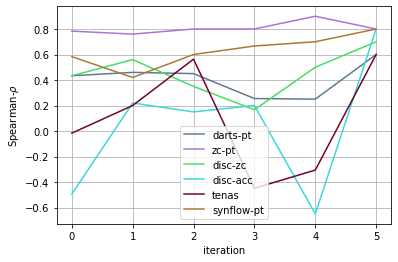

In [277]:
import matplotlib.pyplot as plt
import random

for k,v in correls.items():
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.plot(v,label=k, color=color)
plt.xlabel('iteration')
plt.ylabel('Spearman-$\\rho$')
plt.legend()
plt.grid()
plt.show()

In [278]:
print(seeds_zc)

[[[[3454.2227, 3448.5942, 3439.917, 3443.5508, 3459.2842], [3454.2227, 3451.5684, 3442.229, 3443.3025, 3456.3674], [3454.2227, 3453.9937, 3443.8208, 3443.2834, 3455.4973], [3454.2227, 3437.5054, 3446.7268, 3446.9026, 3448.9456], [3454.2227, 3450.4873, 3444.7363, 3444.004, 3453.9998], [3454.2227, 3450.7974, 3445.511, 3442.5146, 3455.8496]], [[3410.4263, 3398.2515, 3399.248, 3399.6084, 3406.341], [3410.4263, 3412.3748, 3400.7766, 3399.6194, 3413.2373], [3410.4263, 3388.5095, 3411.0461, 3396.8948, 3405.5454], [3410.4263, 3413.923, 3399.1729, 3396.2065, 3415.4045], [3410.4263, 3407.433, 3396.2961, 3396.5044, 3414.144]], [[3407.7637, 3410.3164, 3397.7993, 3396.4685, 3410.7139], [3407.7637, 3394.416, 3407.1438, 3397.2485, 3409.7224], [3407.7637, 3413.7717, 3397.677, 3393.7932, 3414.63], [3407.7637, 3396.2178, 3391.5396, 3390.6956, 3412.6257]], [[3411.9246, 3395.106, 3408.9714, 3400.6265, 3411.457], [3411.9246, 3410.2097, 3402.102, 3398.2625, 3410.8896], [3411.9246, 3396.0486, 3396.4329, 3397

In [279]:
seeds_zc_post

[[[[3033.718, 3021.516, 3027.1863, 3020.9617, 3037.8555],
   [3033.718, 3025.288, 3017.6064, 3013.8333, 3032.5432],
   [3033.718, 3035.1772, 3018.2073, 3018.6677, 3037.6438],
   [3033.718, 3000.205, 3027.769, 3025.363, 3013.8127],
   [3033.718, 3028.4795, 3020.1318, 3020.41, 3033.3254],
   [3033.718, 3029.278, 3031.5808, 3019.37, 3036.4897]],
  [[3005.5046, 3000.849, 2989.905, 2986.5244, 3009.7969],
   [3005.5046, 3008.694, 2986.0205, 2981.9211, 3010.1323],
   [3005.5046, 2973.9795, 2995.4863, 2996.9456, 2991.1482],
   [3005.5046, 3006.5203, 2981.8164, 2985.8533, 3009.1284],
   [3005.5046, 3002.8496, 3003.1018, 2989.465, 3011.202]],
  [[2979.046, 2984.929, 2960.515, 2957.3645, 2986.6196],
   [2979.046, 2953.1233, 2964.4185, 2963.0195, 2970.203],
   [2979.046, 2979.8394, 2955.0237, 2957.9814, 2983.26],
   [2979.046, 2988.5159, 2965.227, 2954.8782, 2992.764]],
  [[2960.2083, 2928.2576, 2942.0337, 2944.9033, 2948.213],
   [2960.2083, 2960.9675, 2933.1477, 2936.4363, 2964.0593],
   [2960.2

In [280]:
synflow_pt = [[[[1.9254546997703658e+31, 7.550824082577545e+30, 1.1723004900851509e+30, 8.792926979292114e+26, 7.761097516638681e+30], [3.315644898238902e+30, 2.364990995395807e+30, 1.3944189408575636e+30, 2.7860638611627277e+29, 2.4449139154865387e+30], [1.027821362609695e+31, 4.60339619278827e+30, 1.3596304579543698e+30, 1.0153355739194138e+28, 5.288227733405575e+30], [2.2246311555904013e+30, 1.9221789522629679e+30, 1.5145494011018092e+30, 7.758504048243155e+29, 1.9084319544482122e+30], [3.30097414765282e+30, 2.4317753487646258e+30, 1.3154927711176233e+30, 2.8553199980410833e+29, 2.635892355076354e+30], [1.8310242389594894e+31, 7.672761253849547e+30, 1.2619444560645407e+30, 8.955410292018776e+26, 7.888486948349449e+30]], [[2.6429034357451325e+36, 2.4201835071162787e+36, 2.082574161801049e+36, 1.0581597364709278e+36, 2.2268849373862722e+36], [1.9084231586756567e+37, 8.630932098450172e+36, 1.649365102414475e+36, 3.190570356896333e+33, 7.779186730084675e+36], [2.172407837428291e+36, 2.2032109685312798e+36, 1.8951150268682847e+36, 1.5489585936318098e+36, 1.8942854055546243e+36], [4.975185764940793e+36, 3.551904881464992e+36, 1.9379154099552753e+36, 2.307116493213678e+35, 3.7423730891260665e+36], [2.230225070642387e+37, 1.0063697919565774e+37, 1.4716318854577188e+36, 1.1356311220147188e+33, 1.0247858280081403e+37]], [[1.4411809186273965e+38, 7.610273872297572e+37, 1.485454189974876e+37, 8.867389682907663e+34, 6.694319809870732e+37], [2.2360291743496667e+37, 2.1822286312565687e+37, 1.958605167501125e+37, 1.6526352243486487e+37, 2.2685386904115774e+37], [4.642566819942127e+37, 3.340228707451924e+37, 1.8136250034691332e+37, 3.771342847042008e+36, 3.2533439183061095e+37], [2.6113192960276024e+38, 1.1325997105418525e+38, 1.4224306580359635e+37, 7.366254555856491e+33, 1.0495650586557928e+38]], [[2.6289442260421542e+42, 2.759583313322214e+42, 2.8465901547928366e+42, 2.4796126715622784e+42, 2.7939468238154254e+42], [3.9044443493234464e+42, 2.929031675907644e+42, 2.502270473367994e+42, 1.2182978568020103e+42, 2.958130286132567e+42], [5.489939426278009e+43, 1.7362965508110916e+43, 1.8853367715424757e+42, 1.5069732289658475e+38, 1.7910834920386312e+43]], [[5.5081687888793165e+42, 4.454629474625495e+42, 3.714018522842759e+42, 1.7230675729486142e+42, 4.5466463594476375e+42], [7.021086500714562e+43, 2.476832962484626e+43, 2.683217167979067e+42, 3.0033541214485753e+38, 2.3808025802826726e+43]], [[7.425118324010795e+44, 2.7570207200206626e+44, 4.50005208275713e+43, 3.423283542381966e+40, 2.5539606709526e+44]]]]
#synflow_pt =[[[[1.9066491244233891e+31, 7.59086596476774e+30, 1.2761640042327054e+30, 9.368294369443349e+26, 8.276941479350743e+30], [2.8970789261653136e+30, 2.4705082188769494e+30, 1.5286197967988062e+30, 2.9235170710997047e+29, 2.4385251086295768e+30], [1.0391507788942851e+31, 5.233770252005386e+30, 1.3011283998914977e+30, 1.0630061122776848e+28, 4.976010830574419e+30], [2.022079389765763e+30, 1.8000107764501034e+30, 1.4098724823520374e+30, 8.922637773448431e+29, 1.7104923770491843e+30], [3.3355671264569285e+30, 2.5179258091370368e+30, 1.5152904968441106e+30, 2.7245380286443705e+29, 2.3867956651433377e+30], [1.918337635492544e+31, 7.653624088948745e+30, 1.1300517153806335e+30, 9.25963905253768e+26, 7.271727745383374e+30]], [[4.8194524504076234e+33, 1.7728678564045847e+33, 2.29248219119843e+32, 6.407673166755515e+28, 1.8500120595133873e+33], [4.911606144231398e+32, 3.925418732774886e+32, 2.8462312243489455e+32, 9.37463265130125e+31, 4.208173192566885e+32], [1.1929662168931389e+33, 7.205815004585994e+32, 2.749436432247935e+32, 9.57830836578603e+30, 7.221122076538115e+32], [3.513621699095887e+32, 3.8069505562796564e+32, 3.082892793870103e+32, 2.0931757152477817e+32, 3.4392953370944175e+32], [1.9501109133712884e+33, 9.96417544088967e+32, 2.5016443545719166e+32, 2.2951100039046091e+30, 9.668392177318337e+32]], [[1.2318913968752236e+39, 1.1978634469108956e+39, 9.84589560854048e+38, 7.472994059420544e+38, 1.1779537857027303e+39], [5.14634417376659e+39, 2.8117582760442484e+39, 9.473161011657448e+38, 2.1078149802609e+37, 2.748851756575773e+39], [1.2053492915153252e+39, 1.1544750726051102e+39, 1.026151191043824e+39, 8.493280346989709e+38, 1.2078321349155028e+39], [5.785819430637556e+39, 3.207629495638249e+39, 8.570643025297522e+38, 1.1735609744146942e+37, 3.262796948668575e+39]], [[5.701479816047024e+43, 5.158180313846472e+43, 4.112639859919638e+43, 2.261904638639082e+43, 5.036130404500024e+43], [4.234775696372864e+44, 1.837441054956865e+44, 3.115736654316421e+43, 5.355129290021907e+40, 1.93571409167039e+44], [5.072722814352137e+43, 4.59787234786339e+43, 4.514633413761941e+43, 3.6782452155952935e+43, 4.442309155218625e+43]], [[2.668019504414336e+49, 2.461547797962873e+49, 2.0608339160616422e+49, 1.9688435029638068e+49, 2.848113686648506e+49], [2.311479162069844e+49, 2.498357758649868e+49, 2.1706785837600433e+49, 2.242587998421618e+49, 2.2264088311049933e+49]], [[3.0927247391095333e+49, 2.912081666284467e+49, 2.6104309405912703e+49, 2.0936145338723704e+49, 2.7428746399147645e+49]]], [[[1.776843359898102e+31, 7.517645391412051e+30, 1.2272437953778574e+30, 9.067067507575539e+26, 7.723792847496024e+30], [3.2943051799310346e+30, 2.4443039231932252e+30, 1.5630715173939474e+30, 2.8207292472098616e+29, 2.6002011700948495e+30], [1.0683286611860239e+31, 4.8882826041037043e+30, 1.2847923173464627e+30, 1.0034314489657176e+28, 5.119309872326821e+30], [2.2719439915636618e+30, 1.8741561003451363e+30, 1.4363732787417998e+30, 8.32067194737174e+29, 1.8905760754585434e+30], [3.5842258202068357e+30, 2.569998872209628e+30, 1.4231414163664872e+30, 2.866219125369357e+29, 2.3756996499004796e+30], [2.037132202287789e+31, 7.685515621466079e+30, 1.2495983034970054e+30, 8.742744556513892e+26, 8.375984306300483e+30]], [[2.39003778413706e+37, 8.903986451341369e+36, 1.486948991729688e+36, 1.2167134662866284e+33, 9.489513141290193e+36], [4.961596807107977e+36, 3.241052467270218e+36, 2.0033366381637494e+36, 2.4964415792341598e+35, 3.3791218593692875e+36], [1.837039675867386e+37, 8.983050621024438e+36, 1.4207748452469987e+36, 3.12219073103596e+33, 9.179994459896991e+36], [2.0972453465502828e+36, 2.055213959598781e+36, 1.9832810604970986e+36, 1.4558674077691342e+36, 2.005672473721588e+36], [2.706306539543075e+36, 2.3728165834070852e+36, 1.838251372886203e+36, 1.0050413446998262e+36, 2.1271203520296836e+36]], [[3.460265292224195e+42, 3.3452770458288777e+42, 2.5071954050290788e+42, 1.1650024819588083e+42, 3.297170846930471e+42], [3.4068273531014904e+43, 1.5123934074662815e+43, 2.0078097378387393e+42, 5.911801088257426e+38, 1.513001342276376e+43], [2.759676210203286e+42, 2.6048378362713504e+42, 2.947126922140741e+42, 2.3842691778808405e+42, 2.6614783511363313e+42], [3.3116396801251015e+42, 3.202799915671852e+42, 2.5346369549348816e+42, 1.1670838663910447e+42, 3.321601678466384e+42]], [[3.8261737537651526e+44, 1.8475478995945063e+44, 3.393374778000048e+43, 5.912862101495754e+40, 1.6804527764662413e+44], [4.515230425144908e+43, 4.289496682292305e+43, 4.0629410702698213e+43, 3.495325178055589e+43, 4.4304824353716405e+43], [5.108441829519133e+43, 5.18254761646732e+43, 4.0496902159727766e+43, 2.4578710439736757e+43, 5.238547768741206e+43]], [[5.288083512401615e+44, 2.4219357964143238e+44, 4.614702453107605e+43, 8.894692070609168e+40, 2.3909408963129827e+44], [7.314882097864785e+43, 6.823500323023478e+43, 5.345626038520399e+43, 3.035853186402601e+43, 7.096052446007027e+43]], [[3.187772377809143e+49, 2.6817869809474684e+49, 2.3969711190393054e+49, 1.9743984138033528e+49, 2.9026129089164944e+49]]], [[[1.9977555262377986e+31, 8.053720419473806e+30, 1.3315679264819853e+30, 9.886423621583909e+26, 7.904825604214349e+30], [3.2168015205929413e+30, 2.558126595669351e+30, 1.5199805174918276e+30, 2.8687559418292343e+29, 2.4656191380244835e+30], [1.0162802884465844e+31, 5.587137827099264e+30, 1.2087003509114727e+30, 9.371961023234813e+27, 5.339112890673366e+30], [1.9314761033976258e+30, 1.9474437089791108e+30, 1.4928893262082382e+30, 8.27768147136015e+29, 1.8325530074407017e+30], [3.3093574778776885e+30, 2.3605204343558125e+30, 1.508449683496885e+30, 3.0594683525697332e+29, 2.338516794767449e+30], [1.895090496713886e+31, 7.583950932857167e+30, 1.0762005458258514e+30, 8.994493699759643e+26, 7.915805407222925e+30]], [[2.405654075882493e+37, 9.803793223237517e+36, 1.582905562178165e+36, 1.0512618726318638e+33, 1.0316789295407026e+37], [5.043291697399176e+36, 3.59356518490111e+36, 2.010274367999118e+36, 2.282520705043211e+35, 3.331595469800402e+36], [1.8168734993516882e+37, 8.465470246670543e+36, 1.445834077360917e+36, 2.881092597572685e+33, 8.391313777445744e+36], [2.329040528653213e+36, 1.98899842067903e+36, 1.9941925117899964e+36, 1.5416622231856824e+36, 2.1548576324962525e+36], [2.499320809271808e+36, 2.3477123550863054e+36, 1.7816563213089136e+36, 1.0792146526461495e+36, 2.2710298203604285e+36]], [[2.7054197159344543e+38, 9.963897888474723e+37, 1.4770274015160858e+37, 7.404140419228714e+33, 1.0690856494142454e+38], [4.056107595401592e+37, 2.9814355523495696e+37, 1.877521455588578e+37, 3.374921549644557e+36, 2.978106190267837e+37], [1.4308016695368704e+38, 6.593878505431314e+37, 1.47098274615589e+37, 9.854581803575784e+34, 6.946469115568375e+37], [2.2254833208436413e+37, 2.0875934765988715e+37, 2.0304439850271668e+37, 1.6552629787044346e+37, 2.1047265183835452e+37]], [[4.60214679315167e+43, 1.4831840817864905e+43, 1.820499942145894e+42, 1.4441485905364129e+38, 1.82240953869246e+43], [3.306528971014144e+42, 3.323034916010986e+42, 2.6733676843124496e+42, 1.1608674443059696e+42, 3.35503355708399e+42], [2.6947034301715737e+42, 2.844944121190609e+42, 2.5765946284463004e+42, 2.3326336992294365e+42, 2.5239441293085866e+42]], [[4.995876294192642e+44, 2.1730593591024276e+44, 3.4060975207298384e+43, 2.381813433030647e+40, 2.2221129779031727e+44], [4.523326128997843e+43, 4.006839318656078e+43, 4.3669222599847675e+43, 3.851716260654986e+43, 4.4129543319423165e+43]], [[6.058836998865584e+49, 6.49049797650214e+49, 6.678295863250472e+49, 6.621445502558447e+49, 6.328417495467574e+49]]], [[[1.9304191026771058e+31, 7.272512035806026e+30, 1.2836329219816466e+30, 8.924712001260043e+26, 7.862056648976691e+30], [2.92056773785622e+30, 2.4686321590519312e+30, 1.4530889943432905e+30, 2.9017899286561264e+29, 2.47406940513535e+30], [9.787008679867699e+30, 5.167029665061556e+30, 1.0986219223645519e+30, 1.0268741723180557e+28, 5.208791433960552e+30], [2.1217835986497613e+30, 2.0014157557372643e+30, 1.5449216123146406e+30, 8.13370089008446e+29, 1.7172640473936995e+30], [2.98764549034388e+30, 2.3934123310573654e+30, 1.300790584382755e+30, 2.9661072298263054e+29, 2.2365864361736408e+30], [1.6400491072633138e+31, 7.723066571216827e+30, 1.2538846492004676e+30, 8.553191809295451e+26, 7.219489474129789e+30]], [[4.9988599858168214e+33, 1.8186431567240084e+33, 2.2321769638222642e+32, 6.403305168056374e+28, 1.740198002100434e+33], [5.089710021571003e+32, 4.2392713032260904e+32, 2.7946500280926354e+32, 9.736061051363474e+31, 3.86256497717134e+32], [1.1017419747761361e+33, 6.947455640591358e+32, 2.6797449409121066e+32, 9.906612587291689e+30, 7.60342716802966e+32], [3.913527613806615e+32, 3.146023917756511e+32, 3.2156169576168095e+32, 1.9902760364398243e+32, 3.271991669669497e+32], [1.6669313371851316e+33, 9.463191712122644e+32, 2.4521834029063824e+32, 2.4282362225874622e+30, 9.809066645068295e+32]], [[3.850053229802789e+37, 1.4392667788797103e+37, 1.3629149760312446e+36, 1.0756546614137097e+32, 1.3040581874729156e+37], [2.743845930534059e+36, 2.3573420595496108e+36, 1.7948259963200866e+36, 1.0269973357864511e+36, 2.2899787905653534e+36], [2.1850786340505032e+36, 2.044891975970733e+36, 1.734473218172767e+36, 1.4082078725980186e+36, 1.9983802165336344e+36], [2.523683904728657e+37, 9.796880635286243e+36, 1.5241734707210022e+36, 1.1951539754755808e+33, 9.492351128305112e+36]], [[2.1330239779930566e+43, 1.8446751079251746e+43, 1.8683120525535333e+43, 1.434608201461354e+43, 2.029562728380592e+43], [2.001699149169402e+43, 1.8229039365608234e+43, 1.7424801345713529e+43, 1.6449437283946375e+43, 1.6980848215384494e+43], [1.9791275435871935e+44, 9.77729919380738e+43, 1.2448265722262992e+43, 1.1046971472132254e+40, 9.463123070786885e+43]], [[4.245099049259067e+43, 3.9622458482675147e+43, 4.152177532095398e+43, 3.5807192906891107e+43, 4.1711839630533664e+43], [5.460272825216541e+44, 2.1631400832667284e+44, 3.0813296385371906e+43, 2.0576730023609923e+40, 1.9173069049272948e+44]], [[7.461844226729829e+44, 2.682737675492044e+44, 4.3059012061575237e+43, 3.5758929911561305e+40, 2.638714034526849e+44]]]]
synflow_disc=[[[[4.6477771740411294e+21, 1.638221073776286e+26, 3.7120972761436067e+30, 2.2121739908281778e+36, 1.5429837376401191e+26], [5.728472199374466e+28, 2.6706198805435412e+29, 1.9639601079996833e+30, 2.953167143416738e+32, 2.2241144543732024e+29], [1.6568394149892187e+25, 3.379148651026692e+27, 3.003344679888645e+30, 1.2013956825907959e+35, 3.489988972605547e+27], [4.618516371183269e+29, 8.13675786303107e+29, 1.5886518641369077e+30, 1.3344265678066146e+31, 7.724266558798499e+29], [5.638031609162397e+28, 2.3425948140068046e+29, 1.9250330545229328e+30, 3.100408369400939e+32, 2.360481437039695e+29], [4.806418631717294e+21, 1.5233948560396852e+26, 3.7286128619859886e+30, 1.9400081289930884e+36, 1.5284530135270584e+26]], [[6.412672317152485e+35, 9.064617086254448e+35, 2.171823600255246e+36, 1.8623842013941647e+37, 9.62717914858624e+35], [2.4938874526607413e+29, 7.410839308298575e+32, 4.407436123456554e+36, 9.391304849189127e+41, 6.452576392384583e+32], [1.2082260597456044e+36, 1.5723081561718573e+36, 1.9823083496684162e+36, 4.759338871984022e+36, 1.64153109759379e+36], [2.9401906169254404e+34, 1.73525197255657e+35, 2.8625753786558897e+36, 1.1822218290481326e+39, 1.8109438769427832e+35], [6.318428944973411e+27, 2.0679252465883123e+32, 4.962587211499646e+36, 2.4864097296933388e+42, 2.0244027096500256e+32]], [[8.96662402715568e+31, 3.113577559525079e+34, 4.0976071603608377e+37, 2.490487386710096e+42, 2.958170482546736e+34], [1.4125561385079335e+37, 1.6418475320152707e+37, 1.8880649238845422e+37, 4.472875189330242e+37, 1.5594518824458112e+37], [6.299859074717689e+35, 2.5825655454098366e+36, 2.617502729069636e+37, 5.2115072954741736e+39, 2.741618935567401e+36], [6.33614022237554e+27, 1.10514128640263e+33, 5.219361753117607e+37, 4.673248679405304e+43, 1.0183311102100683e+33]], [[1.9873242500704884e+42, 2.0287516042295433e+42, 2.6282374032382896e+42, 3.48406626190435e+42, 2.3555512676058643e+42], [5.482375046477959e+41, 1.0626900200254589e+42, 2.978079883346189e+42, 4.103325094539178e+43, 9.516538498208192e+41], [6.856031560104211e+27, 1.1846133938901633e+37, 9.795335881752053e+42, 2.1685954533636858e+49, 1.071296007945726e+37]], [[7.842337998313534e+41, 1.699725062412889e+42, 4.628245279200227e+42, 6.239688259918128e+43, 1.5500155032246935e+42], [1.355025577059643e+29, 2.735908634662456e+37, 1.0051909500915113e+43, 2.631515939947248e+49, 2.4133044167019315e+37]], [[1.811643669832596e+35, 5.613372594541716e+39, 1.3590884723211202e+44, 7.297674470800365e+49, 5.49356041950238e+39]]]]
print(np.array(synflow_pt).shape, np.array(res_disczc).shape)
from scipy import stats
correl_seeds = {}
#,('tenas', seeds_tenas)
for n,reses in [('darts-pt',seeds_dartspt), ('disc-acc',seeds_discacc), ('zc-pt(nwot)',seeds_zc), ('disc-zc(nwot)',seeds_disczc),('zc-pt(synflow)', synflow_pt), ('disc-zc(synflow)',synflow_disc)]:#,('zc-pt-post',seeds_zc_post),('zc-disc-post',seeds_disc_post)]:
    correl_seeds[n] = []
    for k,res in enumerate(reses):
        correl_seeds[n].append([])
        for i,ite in enumerate(res):
            #compute correlation per edge
            to_avg = []
            for j in range(len(ite)):
                cr = stats.spearmanr(ite[j],res_bestacc[i][j]).correlation
                if 'pt' in n:
                    cr = -cr
                #print(n,i,j,cr)
                to_avg.append(cr)
            #print()

            #average over all edges
            avgcr = sum(to_avg)/len(to_avg)
            print(n,i,j,len(to_avg),avgcr)
            correl_seeds[n][k].append(avgcr)
        

/home/hongkaiw/anaconda2/envs/darts/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


(1, 6) (6,)
darts-pt 0 5 6 0.46666666666666656
darts-pt 1 4 5 0.45999999999999996
darts-pt 2 3 4 0.44999999999999996
darts-pt 3 2 3 0.3333333333333333
darts-pt 4 1 2 0.25
darts-pt 5 0 1 0.6
darts-pt 0 5 6 0.4333333333333333
darts-pt 1 4 5 0.43999999999999995
darts-pt 2 3 4 0.5249999999999999
darts-pt 3 2 3 0.4333333333333333
darts-pt 4 1 2 0.25
darts-pt 5 0 1 0.6
darts-pt 0 5 6 0.3833333333333333
darts-pt 1 4 5 0.36
darts-pt 2 3 4 0.475
darts-pt 3 2 3 0.26666666666666666
darts-pt 4 1 2 0.19999999999999998
darts-pt 5 0 1 0.6
darts-pt 0 5 6 0.4333333333333333
darts-pt 1 4 5 0.45999999999999996
darts-pt 2 3 4 0.44999999999999996
darts-pt 3 2 3 0.25476269788227823
darts-pt 4 1 2 0.25
darts-pt 5 0 1 0.6
disc-acc 0 5 6 -0.16666666666666666
disc-acc 1 4 5 0.07999999999999999
disc-acc 2 3 4 0.15
disc-acc 3 2 3 -0.06666666666666668
disc-acc 4 1 2 0.6499999999999999
disc-acc 5 0 1 -0.49999999999999994
disc-acc 0 5 6 -0.5
disc-acc 1 4 5 -2.2204460492503132e-17
disc-acc 2 3 4 0.32499999999999996
d

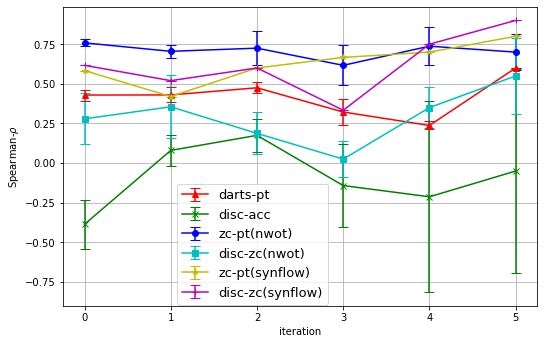

In [281]:
import matplotlib.pyplot as plt
import random
import statistics as stat
import itertools
marker = itertools.cycle(('^', 'x', 'o', 's', '*', '+', '1')) 
color = itertools.cycle(('r', 'g', 'b', 'c', 'y', 'm', 'k')) 
plt.figure(figsize=(8.5,5.5))
x = np.array([0, 1, 2, 3, 4, 5])
for k,v in correl_seeds.items():
    mline = [] 
    err = []
    for i in range(len(v[0])):
        mline.append(stat.mean([x[i] for x in v]))
        if len(v) == 1:
            err.append(0)
        else:
            err.append(stat.stdev([x[i] for x in v]))
    #print(v)
    #print(mline)
    plt.errorbar(x, mline, err, marker=next(marker),label=k, color=next(color),capsize=5.0)
    #plt.plot(v,label=k, color=color)
plt.xlabel('iteration')
plt.ylabel('Spearman-$\\rho$')
plt.legend(bbox_to_anchor=(0.4, 0.43), prop={'size': 13})
plt.grid()
plt.savefig(pathlib.Path('op_correl_time').with_suffix('.pdf'), bbox_inches='tight')
plt.show()

In [282]:
synflow_pt = [[[[1.9254546997703658e+31, 7.550824082577545e+30, 1.1723004900851509e+30, 8.792926979292114e+26, 7.761097516638681e+30], [3.315644898238902e+30, 2.364990995395807e+30, 1.3944189408575636e+30, 2.7860638611627277e+29, 2.4449139154865387e+30], [1.027821362609695e+31, 4.60339619278827e+30, 1.3596304579543698e+30, 1.0153355739194138e+28, 5.288227733405575e+30], [2.2246311555904013e+30, 1.9221789522629679e+30, 1.5145494011018092e+30, 7.758504048243155e+29, 1.9084319544482122e+30], [3.30097414765282e+30, 2.4317753487646258e+30, 1.3154927711176233e+30, 2.8553199980410833e+29, 2.635892355076354e+30], [1.8310242389594894e+31, 7.672761253849547e+30, 1.2619444560645407e+30, 8.955410292018776e+26, 7.888486948349449e+30]], [[2.6429034357451325e+36, 2.4201835071162787e+36, 2.082574161801049e+36, 1.0581597364709278e+36, 2.2268849373862722e+36], [1.9084231586756567e+37, 8.630932098450172e+36, 1.649365102414475e+36, 3.190570356896333e+33, 7.779186730084675e+36], [2.172407837428291e+36, 2.2032109685312798e+36, 1.8951150268682847e+36, 1.5489585936318098e+36, 1.8942854055546243e+36], [4.975185764940793e+36, 3.551904881464992e+36, 1.9379154099552753e+36, 2.307116493213678e+35, 3.7423730891260665e+36], [2.230225070642387e+37, 1.0063697919565774e+37, 1.4716318854577188e+36, 1.1356311220147188e+33, 1.0247858280081403e+37]], [[1.4411809186273965e+38, 7.610273872297572e+37, 1.485454189974876e+37, 8.867389682907663e+34, 6.694319809870732e+37], [2.2360291743496667e+37, 2.1822286312565687e+37, 1.958605167501125e+37, 1.6526352243486487e+37, 2.2685386904115774e+37], [4.642566819942127e+37, 3.340228707451924e+37, 1.8136250034691332e+37, 3.771342847042008e+36, 3.2533439183061095e+37], [2.6113192960276024e+38, 1.1325997105418525e+38, 1.4224306580359635e+37, 7.366254555856491e+33, 1.0495650586557928e+38]], [[2.6289442260421542e+42, 2.759583313322214e+42, 2.8465901547928366e+42, 2.4796126715622784e+42, 2.7939468238154254e+42], [3.9044443493234464e+42, 2.929031675907644e+42, 2.502270473367994e+42, 1.2182978568020103e+42, 2.958130286132567e+42], [5.489939426278009e+43, 1.7362965508110916e+43, 1.8853367715424757e+42, 1.5069732289658475e+38, 1.7910834920386312e+43]], [[5.5081687888793165e+42, 4.454629474625495e+42, 3.714018522842759e+42, 1.7230675729486142e+42, 4.5466463594476375e+42], [7.021086500714562e+43, 2.476832962484626e+43, 2.683217167979067e+42, 3.0033541214485753e+38, 2.3808025802826726e+43]], [[7.425118324010795e+44, 2.7570207200206626e+44, 4.50005208275713e+43, 3.423283542381966e+40, 2.5539606709526e+44]]]]
#synflow_pt =[[[[1.9066491244233891e+31, 7.59086596476774e+30, 1.2761640042327054e+30, 9.368294369443349e+26, 8.276941479350743e+30], [2.8970789261653136e+30, 2.4705082188769494e+30, 1.5286197967988062e+30, 2.9235170710997047e+29, 2.4385251086295768e+30], [1.0391507788942851e+31, 5.233770252005386e+30, 1.3011283998914977e+30, 1.0630061122776848e+28, 4.976010830574419e+30], [2.022079389765763e+30, 1.8000107764501034e+30, 1.4098724823520374e+30, 8.922637773448431e+29, 1.7104923770491843e+30], [3.3355671264569285e+30, 2.5179258091370368e+30, 1.5152904968441106e+30, 2.7245380286443705e+29, 2.3867956651433377e+30], [1.918337635492544e+31, 7.653624088948745e+30, 1.1300517153806335e+30, 9.25963905253768e+26, 7.271727745383374e+30]], [[4.8194524504076234e+33, 1.7728678564045847e+33, 2.29248219119843e+32, 6.407673166755515e+28, 1.8500120595133873e+33], [4.911606144231398e+32, 3.925418732774886e+32, 2.8462312243489455e+32, 9.37463265130125e+31, 4.208173192566885e+32], [1.1929662168931389e+33, 7.205815004585994e+32, 2.749436432247935e+32, 9.57830836578603e+30, 7.221122076538115e+32], [3.513621699095887e+32, 3.8069505562796564e+32, 3.082892793870103e+32, 2.0931757152477817e+32, 3.4392953370944175e+32], [1.9501109133712884e+33, 9.96417544088967e+32, 2.5016443545719166e+32, 2.2951100039046091e+30, 9.668392177318337e+32]], [[1.2318913968752236e+39, 1.1978634469108956e+39, 9.84589560854048e+38, 7.472994059420544e+38, 1.1779537857027303e+39], [5.14634417376659e+39, 2.8117582760442484e+39, 9.473161011657448e+38, 2.1078149802609e+37, 2.748851756575773e+39], [1.2053492915153252e+39, 1.1544750726051102e+39, 1.026151191043824e+39, 8.493280346989709e+38, 1.2078321349155028e+39], [5.785819430637556e+39, 3.207629495638249e+39, 8.570643025297522e+38, 1.1735609744146942e+37, 3.262796948668575e+39]], [[5.701479816047024e+43, 5.158180313846472e+43, 4.112639859919638e+43, 2.261904638639082e+43, 5.036130404500024e+43], [4.234775696372864e+44, 1.837441054956865e+44, 3.115736654316421e+43, 5.355129290021907e+40, 1.93571409167039e+44], [5.072722814352137e+43, 4.59787234786339e+43, 4.514633413761941e+43, 3.6782452155952935e+43, 4.442309155218625e+43]], [[2.668019504414336e+49, 2.461547797962873e+49, 2.0608339160616422e+49, 1.9688435029638068e+49, 2.848113686648506e+49], [2.311479162069844e+49, 2.498357758649868e+49, 2.1706785837600433e+49, 2.242587998421618e+49, 2.2264088311049933e+49]], [[3.0927247391095333e+49, 2.912081666284467e+49, 2.6104309405912703e+49, 2.0936145338723704e+49, 2.7428746399147645e+49]]], [[[1.776843359898102e+31, 7.517645391412051e+30, 1.2272437953778574e+30, 9.067067507575539e+26, 7.723792847496024e+30], [3.2943051799310346e+30, 2.4443039231932252e+30, 1.5630715173939474e+30, 2.8207292472098616e+29, 2.6002011700948495e+30], [1.0683286611860239e+31, 4.8882826041037043e+30, 1.2847923173464627e+30, 1.0034314489657176e+28, 5.119309872326821e+30], [2.2719439915636618e+30, 1.8741561003451363e+30, 1.4363732787417998e+30, 8.32067194737174e+29, 1.8905760754585434e+30], [3.5842258202068357e+30, 2.569998872209628e+30, 1.4231414163664872e+30, 2.866219125369357e+29, 2.3756996499004796e+30], [2.037132202287789e+31, 7.685515621466079e+30, 1.2495983034970054e+30, 8.742744556513892e+26, 8.375984306300483e+30]], [[2.39003778413706e+37, 8.903986451341369e+36, 1.486948991729688e+36, 1.2167134662866284e+33, 9.489513141290193e+36], [4.961596807107977e+36, 3.241052467270218e+36, 2.0033366381637494e+36, 2.4964415792341598e+35, 3.3791218593692875e+36], [1.837039675867386e+37, 8.983050621024438e+36, 1.4207748452469987e+36, 3.12219073103596e+33, 9.179994459896991e+36], [2.0972453465502828e+36, 2.055213959598781e+36, 1.9832810604970986e+36, 1.4558674077691342e+36, 2.005672473721588e+36], [2.706306539543075e+36, 2.3728165834070852e+36, 1.838251372886203e+36, 1.0050413446998262e+36, 2.1271203520296836e+36]], [[3.460265292224195e+42, 3.3452770458288777e+42, 2.5071954050290788e+42, 1.1650024819588083e+42, 3.297170846930471e+42], [3.4068273531014904e+43, 1.5123934074662815e+43, 2.0078097378387393e+42, 5.911801088257426e+38, 1.513001342276376e+43], [2.759676210203286e+42, 2.6048378362713504e+42, 2.947126922140741e+42, 2.3842691778808405e+42, 2.6614783511363313e+42], [3.3116396801251015e+42, 3.202799915671852e+42, 2.5346369549348816e+42, 1.1670838663910447e+42, 3.321601678466384e+42]], [[3.8261737537651526e+44, 1.8475478995945063e+44, 3.393374778000048e+43, 5.912862101495754e+40, 1.6804527764662413e+44], [4.515230425144908e+43, 4.289496682292305e+43, 4.0629410702698213e+43, 3.495325178055589e+43, 4.4304824353716405e+43], [5.108441829519133e+43, 5.18254761646732e+43, 4.0496902159727766e+43, 2.4578710439736757e+43, 5.238547768741206e+43]], [[5.288083512401615e+44, 2.4219357964143238e+44, 4.614702453107605e+43, 8.894692070609168e+40, 2.3909408963129827e+44], [7.314882097864785e+43, 6.823500323023478e+43, 5.345626038520399e+43, 3.035853186402601e+43, 7.096052446007027e+43]], [[3.187772377809143e+49, 2.6817869809474684e+49, 2.3969711190393054e+49, 1.9743984138033528e+49, 2.9026129089164944e+49]]], [[[1.9977555262377986e+31, 8.053720419473806e+30, 1.3315679264819853e+30, 9.886423621583909e+26, 7.904825604214349e+30], [3.2168015205929413e+30, 2.558126595669351e+30, 1.5199805174918276e+30, 2.8687559418292343e+29, 2.4656191380244835e+30], [1.0162802884465844e+31, 5.587137827099264e+30, 1.2087003509114727e+30, 9.371961023234813e+27, 5.339112890673366e+30], [1.9314761033976258e+30, 1.9474437089791108e+30, 1.4928893262082382e+30, 8.27768147136015e+29, 1.8325530074407017e+30], [3.3093574778776885e+30, 2.3605204343558125e+30, 1.508449683496885e+30, 3.0594683525697332e+29, 2.338516794767449e+30], [1.895090496713886e+31, 7.583950932857167e+30, 1.0762005458258514e+30, 8.994493699759643e+26, 7.915805407222925e+30]], [[2.405654075882493e+37, 9.803793223237517e+36, 1.582905562178165e+36, 1.0512618726318638e+33, 1.0316789295407026e+37], [5.043291697399176e+36, 3.59356518490111e+36, 2.010274367999118e+36, 2.282520705043211e+35, 3.331595469800402e+36], [1.8168734993516882e+37, 8.465470246670543e+36, 1.445834077360917e+36, 2.881092597572685e+33, 8.391313777445744e+36], [2.329040528653213e+36, 1.98899842067903e+36, 1.9941925117899964e+36, 1.5416622231856824e+36, 2.1548576324962525e+36], [2.499320809271808e+36, 2.3477123550863054e+36, 1.7816563213089136e+36, 1.0792146526461495e+36, 2.2710298203604285e+36]], [[2.7054197159344543e+38, 9.963897888474723e+37, 1.4770274015160858e+37, 7.404140419228714e+33, 1.0690856494142454e+38], [4.056107595401592e+37, 2.9814355523495696e+37, 1.877521455588578e+37, 3.374921549644557e+36, 2.978106190267837e+37], [1.4308016695368704e+38, 6.593878505431314e+37, 1.47098274615589e+37, 9.854581803575784e+34, 6.946469115568375e+37], [2.2254833208436413e+37, 2.0875934765988715e+37, 2.0304439850271668e+37, 1.6552629787044346e+37, 2.1047265183835452e+37]], [[4.60214679315167e+43, 1.4831840817864905e+43, 1.820499942145894e+42, 1.4441485905364129e+38, 1.82240953869246e+43], [3.306528971014144e+42, 3.323034916010986e+42, 2.6733676843124496e+42, 1.1608674443059696e+42, 3.35503355708399e+42], [2.6947034301715737e+42, 2.844944121190609e+42, 2.5765946284463004e+42, 2.3326336992294365e+42, 2.5239441293085866e+42]], [[4.995876294192642e+44, 2.1730593591024276e+44, 3.4060975207298384e+43, 2.381813433030647e+40, 2.2221129779031727e+44], [4.523326128997843e+43, 4.006839318656078e+43, 4.3669222599847675e+43, 3.851716260654986e+43, 4.4129543319423165e+43]], [[6.058836998865584e+49, 6.49049797650214e+49, 6.678295863250472e+49, 6.621445502558447e+49, 6.328417495467574e+49]]], [[[1.9304191026771058e+31, 7.272512035806026e+30, 1.2836329219816466e+30, 8.924712001260043e+26, 7.862056648976691e+30], [2.92056773785622e+30, 2.4686321590519312e+30, 1.4530889943432905e+30, 2.9017899286561264e+29, 2.47406940513535e+30], [9.787008679867699e+30, 5.167029665061556e+30, 1.0986219223645519e+30, 1.0268741723180557e+28, 5.208791433960552e+30], [2.1217835986497613e+30, 2.0014157557372643e+30, 1.5449216123146406e+30, 8.13370089008446e+29, 1.7172640473936995e+30], [2.98764549034388e+30, 2.3934123310573654e+30, 1.300790584382755e+30, 2.9661072298263054e+29, 2.2365864361736408e+30], [1.6400491072633138e+31, 7.723066571216827e+30, 1.2538846492004676e+30, 8.553191809295451e+26, 7.219489474129789e+30]], [[4.9988599858168214e+33, 1.8186431567240084e+33, 2.2321769638222642e+32, 6.403305168056374e+28, 1.740198002100434e+33], [5.089710021571003e+32, 4.2392713032260904e+32, 2.7946500280926354e+32, 9.736061051363474e+31, 3.86256497717134e+32], [1.1017419747761361e+33, 6.947455640591358e+32, 2.6797449409121066e+32, 9.906612587291689e+30, 7.60342716802966e+32], [3.913527613806615e+32, 3.146023917756511e+32, 3.2156169576168095e+32, 1.9902760364398243e+32, 3.271991669669497e+32], [1.6669313371851316e+33, 9.463191712122644e+32, 2.4521834029063824e+32, 2.4282362225874622e+30, 9.809066645068295e+32]], [[3.850053229802789e+37, 1.4392667788797103e+37, 1.3629149760312446e+36, 1.0756546614137097e+32, 1.3040581874729156e+37], [2.743845930534059e+36, 2.3573420595496108e+36, 1.7948259963200866e+36, 1.0269973357864511e+36, 2.2899787905653534e+36], [2.1850786340505032e+36, 2.044891975970733e+36, 1.734473218172767e+36, 1.4082078725980186e+36, 1.9983802165336344e+36], [2.523683904728657e+37, 9.796880635286243e+36, 1.5241734707210022e+36, 1.1951539754755808e+33, 9.492351128305112e+36]], [[2.1330239779930566e+43, 1.8446751079251746e+43, 1.8683120525535333e+43, 1.434608201461354e+43, 2.029562728380592e+43], [2.001699149169402e+43, 1.8229039365608234e+43, 1.7424801345713529e+43, 1.6449437283946375e+43, 1.6980848215384494e+43], [1.9791275435871935e+44, 9.77729919380738e+43, 1.2448265722262992e+43, 1.1046971472132254e+40, 9.463123070786885e+43]], [[4.245099049259067e+43, 3.9622458482675147e+43, 4.152177532095398e+43, 3.5807192906891107e+43, 4.1711839630533664e+43], [5.460272825216541e+44, 2.1631400832667284e+44, 3.0813296385371906e+43, 2.0576730023609923e+40, 1.9173069049272948e+44]], [[7.461844226729829e+44, 2.682737675492044e+44, 4.3059012061575237e+43, 3.5758929911561305e+40, 2.638714034526849e+44]]]]
synflow_disc=[[[[4.6477771740411294e+21, 1.638221073776286e+26, 3.7120972761436067e+30, 2.2121739908281778e+36, 1.5429837376401191e+26], [5.728472199374466e+28, 2.6706198805435412e+29, 1.9639601079996833e+30, 2.953167143416738e+32, 2.2241144543732024e+29], [1.6568394149892187e+25, 3.379148651026692e+27, 3.003344679888645e+30, 1.2013956825907959e+35, 3.489988972605547e+27], [4.618516371183269e+29, 8.13675786303107e+29, 1.5886518641369077e+30, 1.3344265678066146e+31, 7.724266558798499e+29], [5.638031609162397e+28, 2.3425948140068046e+29, 1.9250330545229328e+30, 3.100408369400939e+32, 2.360481437039695e+29], [4.806418631717294e+21, 1.5233948560396852e+26, 3.7286128619859886e+30, 1.9400081289930884e+36, 1.5284530135270584e+26]], [[6.412672317152485e+35, 9.064617086254448e+35, 2.171823600255246e+36, 1.8623842013941647e+37, 9.62717914858624e+35], [2.4938874526607413e+29, 7.410839308298575e+32, 4.407436123456554e+36, 9.391304849189127e+41, 6.452576392384583e+32], [1.2082260597456044e+36, 1.5723081561718573e+36, 1.9823083496684162e+36, 4.759338871984022e+36, 1.64153109759379e+36], [2.9401906169254404e+34, 1.73525197255657e+35, 2.8625753786558897e+36, 1.1822218290481326e+39, 1.8109438769427832e+35], [6.318428944973411e+27, 2.0679252465883123e+32, 4.962587211499646e+36, 2.4864097296933388e+42, 2.0244027096500256e+32]], [[8.96662402715568e+31, 3.113577559525079e+34, 4.0976071603608377e+37, 2.490487386710096e+42, 2.958170482546736e+34], [1.4125561385079335e+37, 1.6418475320152707e+37, 1.8880649238845422e+37, 4.472875189330242e+37, 1.5594518824458112e+37], [6.299859074717689e+35, 2.5825655454098366e+36, 2.617502729069636e+37, 5.2115072954741736e+39, 2.741618935567401e+36], [6.33614022237554e+27, 1.10514128640263e+33, 5.219361753117607e+37, 4.673248679405304e+43, 1.0183311102100683e+33]], [[1.9873242500704884e+42, 2.0287516042295433e+42, 2.6282374032382896e+42, 3.48406626190435e+42, 2.3555512676058643e+42], [5.482375046477959e+41, 1.0626900200254589e+42, 2.978079883346189e+42, 4.103325094539178e+43, 9.516538498208192e+41], [6.856031560104211e+27, 1.1846133938901633e+37, 9.795335881752053e+42, 2.1685954533636858e+49, 1.071296007945726e+37]], [[7.842337998313534e+41, 1.699725062412889e+42, 4.628245279200227e+42, 6.239688259918128e+43, 1.5500155032246935e+42], [1.355025577059643e+29, 2.735908634662456e+37, 1.0051909500915113e+43, 2.631515939947248e+49, 2.4133044167019315e+37]], [[1.811643669832596e+35, 5.613372594541716e+39, 1.3590884723211202e+44, 7.297674470800365e+49, 5.49356041950238e+39]]]]
print(np.array(synflow_pt).shape, np.array(res_disczc).shape)
from scipy import stats
correl_seeds = {}
#,('tenas', seeds_tenas)
for n,reses in [('zc-pt(nwot)',seeds_zc), ('disc-zc(nwot)',seeds_disczc)]:#,('zc-pt-post',seeds_zc_post),('zc-disc-post',seeds_disc_post)]:
    correl_seeds[n] = []
    for k,res in enumerate(reses):
        correl_seeds[n].append([])
        for i,ite in enumerate(res):
            #compute correlation per edge
            to_avg = []
            for j in range(len(ite)):
                cr = stats.spearmanr(ite[j],res_bestnwot[i][j]).correlation
                if 'pt' in n:
                    cr = -cr
                #print(n,i,j,cr)
                to_avg.append(cr)
            #print()

            #average over all edges
            avgcr = sum(to_avg)/len(to_avg)
            print(n,i,j,len(to_avg),avgcr)
            correl_seeds[n][k].append(avgcr)
        

(1, 6) (6,)
zc-pt(nwot) 0 5 6 0.7333333333333333
zc-pt(nwot) 1 4 5 0.41999999999999993
zc-pt(nwot) 2 3 4 0.575
zc-pt(nwot) 3 2 3 0.5666666666666665
zc-pt(nwot) 4 1 2 0.75
zc-pt(nwot) 5 0 1 0.7999999999999999
zc-pt(nwot) 0 5 6 0.7833333333333332
zc-pt(nwot) 1 4 5 0.41999999999999993
zc-pt(nwot) 2 3 4 0.3
zc-pt(nwot) 3 2 3 0.2333333333333333
zc-pt(nwot) 4 1 2 0.6499999999999999
zc-pt(nwot) 5 0 1 0.6
zc-pt(nwot) 0 5 6 0.7333333333333333
zc-pt(nwot) 1 4 5 0.48
zc-pt(nwot) 2 3 4 0.39999999999999997
zc-pt(nwot) 3 2 3 0.3333333333333333
zc-pt(nwot) 4 1 2 0.35
zc-pt(nwot) 5 0 1 0.6
zc-pt(nwot) 0 5 6 0.6499999999999999
zc-pt(nwot) 1 4 5 0.47999999999999987
zc-pt(nwot) 2 3 4 0.475
zc-pt(nwot) 3 2 3 0.5
zc-pt(nwot) 4 1 2 0.4999999999999999
zc-pt(nwot) 5 0 1 0.7999999999999999
disc-zc(nwot) 0 5 6 0.18333333333333332
disc-zc(nwot) 1 4 5 0.19999999999999993
disc-zc(nwot) 2 3 4 -0.05
disc-zc(nwot) 3 2 3 0.09999999999999998
disc-zc(nwot) 4 1 2 0.7
disc-zc(nwot) 5 0 1 0.19999999999999998
disc-zc(nwot) 

/home/hongkaiw/anaconda2/envs/darts/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


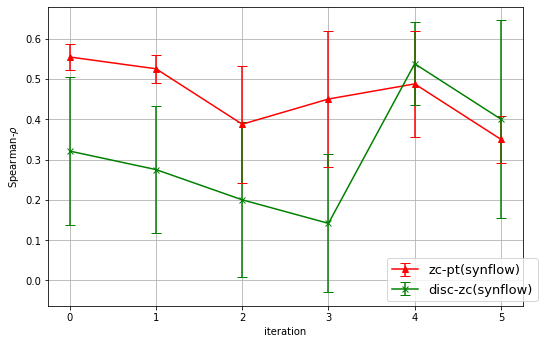

In [286]:
import matplotlib.pyplot as plt
import random
import statistics as stat
import itertools
marker = itertools.cycle(('^', 'x', 'o', 's', '*', '+')) 
color = itertools.cycle(('r', 'g', 'b', 'c', 'y', 'm')) 
plt.figure(figsize=(8.5,5.5))
x = np.array([0, 1, 2, 3, 4, 5])
for k,v in correl_seeds.items():
    mline = [] 
    err = []
    for i in range(len(v[0])):
        mline.append(stat.mean([x[i] for x in v]))
        if len(v) == 1:
            err.append(0)
        else:
            err.append(stat.stdev([x[i] for x in v]))
    #print(v)
    #print(mline)
    plt.errorbar(x, mline, err, marker=next(marker),label=k, color=next(color),capsize=5.0)
    #plt.plot(v,label=k, color=color)
plt.xlabel('iteration')
plt.ylabel('Spearman-$\\rho$')
plt.legend(bbox_to_anchor=(0.7, 0.18), prop={'size': 13})
plt.grid()
plt.savefig(pathlib.Path('op_correl_time_nwot').with_suffix('.pdf'), bbox_inches='tight')
plt.show()

In [287]:
synflow_pt = [[[[1.9254546997703658e+31, 7.550824082577545e+30, 1.1723004900851509e+30, 8.792926979292114e+26, 7.761097516638681e+30], [3.315644898238902e+30, 2.364990995395807e+30, 1.3944189408575636e+30, 2.7860638611627277e+29, 2.4449139154865387e+30], [1.027821362609695e+31, 4.60339619278827e+30, 1.3596304579543698e+30, 1.0153355739194138e+28, 5.288227733405575e+30], [2.2246311555904013e+30, 1.9221789522629679e+30, 1.5145494011018092e+30, 7.758504048243155e+29, 1.9084319544482122e+30], [3.30097414765282e+30, 2.4317753487646258e+30, 1.3154927711176233e+30, 2.8553199980410833e+29, 2.635892355076354e+30], [1.8310242389594894e+31, 7.672761253849547e+30, 1.2619444560645407e+30, 8.955410292018776e+26, 7.888486948349449e+30]], [[2.6429034357451325e+36, 2.4201835071162787e+36, 2.082574161801049e+36, 1.0581597364709278e+36, 2.2268849373862722e+36], [1.9084231586756567e+37, 8.630932098450172e+36, 1.649365102414475e+36, 3.190570356896333e+33, 7.779186730084675e+36], [2.172407837428291e+36, 2.2032109685312798e+36, 1.8951150268682847e+36, 1.5489585936318098e+36, 1.8942854055546243e+36], [4.975185764940793e+36, 3.551904881464992e+36, 1.9379154099552753e+36, 2.307116493213678e+35, 3.7423730891260665e+36], [2.230225070642387e+37, 1.0063697919565774e+37, 1.4716318854577188e+36, 1.1356311220147188e+33, 1.0247858280081403e+37]], [[1.4411809186273965e+38, 7.610273872297572e+37, 1.485454189974876e+37, 8.867389682907663e+34, 6.694319809870732e+37], [2.2360291743496667e+37, 2.1822286312565687e+37, 1.958605167501125e+37, 1.6526352243486487e+37, 2.2685386904115774e+37], [4.642566819942127e+37, 3.340228707451924e+37, 1.8136250034691332e+37, 3.771342847042008e+36, 3.2533439183061095e+37], [2.6113192960276024e+38, 1.1325997105418525e+38, 1.4224306580359635e+37, 7.366254555856491e+33, 1.0495650586557928e+38]], [[2.6289442260421542e+42, 2.759583313322214e+42, 2.8465901547928366e+42, 2.4796126715622784e+42, 2.7939468238154254e+42], [3.9044443493234464e+42, 2.929031675907644e+42, 2.502270473367994e+42, 1.2182978568020103e+42, 2.958130286132567e+42], [5.489939426278009e+43, 1.7362965508110916e+43, 1.8853367715424757e+42, 1.5069732289658475e+38, 1.7910834920386312e+43]], [[5.5081687888793165e+42, 4.454629474625495e+42, 3.714018522842759e+42, 1.7230675729486142e+42, 4.5466463594476375e+42], [7.021086500714562e+43, 2.476832962484626e+43, 2.683217167979067e+42, 3.0033541214485753e+38, 2.3808025802826726e+43]], [[7.425118324010795e+44, 2.7570207200206626e+44, 4.50005208275713e+43, 3.423283542381966e+40, 2.5539606709526e+44]]]]
#synflow_pt =[[[[1.9066491244233891e+31, 7.59086596476774e+30, 1.2761640042327054e+30, 9.368294369443349e+26, 8.276941479350743e+30], [2.8970789261653136e+30, 2.4705082188769494e+30, 1.5286197967988062e+30, 2.9235170710997047e+29, 2.4385251086295768e+30], [1.0391507788942851e+31, 5.233770252005386e+30, 1.3011283998914977e+30, 1.0630061122776848e+28, 4.976010830574419e+30], [2.022079389765763e+30, 1.8000107764501034e+30, 1.4098724823520374e+30, 8.922637773448431e+29, 1.7104923770491843e+30], [3.3355671264569285e+30, 2.5179258091370368e+30, 1.5152904968441106e+30, 2.7245380286443705e+29, 2.3867956651433377e+30], [1.918337635492544e+31, 7.653624088948745e+30, 1.1300517153806335e+30, 9.25963905253768e+26, 7.271727745383374e+30]], [[4.8194524504076234e+33, 1.7728678564045847e+33, 2.29248219119843e+32, 6.407673166755515e+28, 1.8500120595133873e+33], [4.911606144231398e+32, 3.925418732774886e+32, 2.8462312243489455e+32, 9.37463265130125e+31, 4.208173192566885e+32], [1.1929662168931389e+33, 7.205815004585994e+32, 2.749436432247935e+32, 9.57830836578603e+30, 7.221122076538115e+32], [3.513621699095887e+32, 3.8069505562796564e+32, 3.082892793870103e+32, 2.0931757152477817e+32, 3.4392953370944175e+32], [1.9501109133712884e+33, 9.96417544088967e+32, 2.5016443545719166e+32, 2.2951100039046091e+30, 9.668392177318337e+32]], [[1.2318913968752236e+39, 1.1978634469108956e+39, 9.84589560854048e+38, 7.472994059420544e+38, 1.1779537857027303e+39], [5.14634417376659e+39, 2.8117582760442484e+39, 9.473161011657448e+38, 2.1078149802609e+37, 2.748851756575773e+39], [1.2053492915153252e+39, 1.1544750726051102e+39, 1.026151191043824e+39, 8.493280346989709e+38, 1.2078321349155028e+39], [5.785819430637556e+39, 3.207629495638249e+39, 8.570643025297522e+38, 1.1735609744146942e+37, 3.262796948668575e+39]], [[5.701479816047024e+43, 5.158180313846472e+43, 4.112639859919638e+43, 2.261904638639082e+43, 5.036130404500024e+43], [4.234775696372864e+44, 1.837441054956865e+44, 3.115736654316421e+43, 5.355129290021907e+40, 1.93571409167039e+44], [5.072722814352137e+43, 4.59787234786339e+43, 4.514633413761941e+43, 3.6782452155952935e+43, 4.442309155218625e+43]], [[2.668019504414336e+49, 2.461547797962873e+49, 2.0608339160616422e+49, 1.9688435029638068e+49, 2.848113686648506e+49], [2.311479162069844e+49, 2.498357758649868e+49, 2.1706785837600433e+49, 2.242587998421618e+49, 2.2264088311049933e+49]], [[3.0927247391095333e+49, 2.912081666284467e+49, 2.6104309405912703e+49, 2.0936145338723704e+49, 2.7428746399147645e+49]]], [[[1.776843359898102e+31, 7.517645391412051e+30, 1.2272437953778574e+30, 9.067067507575539e+26, 7.723792847496024e+30], [3.2943051799310346e+30, 2.4443039231932252e+30, 1.5630715173939474e+30, 2.8207292472098616e+29, 2.6002011700948495e+30], [1.0683286611860239e+31, 4.8882826041037043e+30, 1.2847923173464627e+30, 1.0034314489657176e+28, 5.119309872326821e+30], [2.2719439915636618e+30, 1.8741561003451363e+30, 1.4363732787417998e+30, 8.32067194737174e+29, 1.8905760754585434e+30], [3.5842258202068357e+30, 2.569998872209628e+30, 1.4231414163664872e+30, 2.866219125369357e+29, 2.3756996499004796e+30], [2.037132202287789e+31, 7.685515621466079e+30, 1.2495983034970054e+30, 8.742744556513892e+26, 8.375984306300483e+30]], [[2.39003778413706e+37, 8.903986451341369e+36, 1.486948991729688e+36, 1.2167134662866284e+33, 9.489513141290193e+36], [4.961596807107977e+36, 3.241052467270218e+36, 2.0033366381637494e+36, 2.4964415792341598e+35, 3.3791218593692875e+36], [1.837039675867386e+37, 8.983050621024438e+36, 1.4207748452469987e+36, 3.12219073103596e+33, 9.179994459896991e+36], [2.0972453465502828e+36, 2.055213959598781e+36, 1.9832810604970986e+36, 1.4558674077691342e+36, 2.005672473721588e+36], [2.706306539543075e+36, 2.3728165834070852e+36, 1.838251372886203e+36, 1.0050413446998262e+36, 2.1271203520296836e+36]], [[3.460265292224195e+42, 3.3452770458288777e+42, 2.5071954050290788e+42, 1.1650024819588083e+42, 3.297170846930471e+42], [3.4068273531014904e+43, 1.5123934074662815e+43, 2.0078097378387393e+42, 5.911801088257426e+38, 1.513001342276376e+43], [2.759676210203286e+42, 2.6048378362713504e+42, 2.947126922140741e+42, 2.3842691778808405e+42, 2.6614783511363313e+42], [3.3116396801251015e+42, 3.202799915671852e+42, 2.5346369549348816e+42, 1.1670838663910447e+42, 3.321601678466384e+42]], [[3.8261737537651526e+44, 1.8475478995945063e+44, 3.393374778000048e+43, 5.912862101495754e+40, 1.6804527764662413e+44], [4.515230425144908e+43, 4.289496682292305e+43, 4.0629410702698213e+43, 3.495325178055589e+43, 4.4304824353716405e+43], [5.108441829519133e+43, 5.18254761646732e+43, 4.0496902159727766e+43, 2.4578710439736757e+43, 5.238547768741206e+43]], [[5.288083512401615e+44, 2.4219357964143238e+44, 4.614702453107605e+43, 8.894692070609168e+40, 2.3909408963129827e+44], [7.314882097864785e+43, 6.823500323023478e+43, 5.345626038520399e+43, 3.035853186402601e+43, 7.096052446007027e+43]], [[3.187772377809143e+49, 2.6817869809474684e+49, 2.3969711190393054e+49, 1.9743984138033528e+49, 2.9026129089164944e+49]]], [[[1.9977555262377986e+31, 8.053720419473806e+30, 1.3315679264819853e+30, 9.886423621583909e+26, 7.904825604214349e+30], [3.2168015205929413e+30, 2.558126595669351e+30, 1.5199805174918276e+30, 2.8687559418292343e+29, 2.4656191380244835e+30], [1.0162802884465844e+31, 5.587137827099264e+30, 1.2087003509114727e+30, 9.371961023234813e+27, 5.339112890673366e+30], [1.9314761033976258e+30, 1.9474437089791108e+30, 1.4928893262082382e+30, 8.27768147136015e+29, 1.8325530074407017e+30], [3.3093574778776885e+30, 2.3605204343558125e+30, 1.508449683496885e+30, 3.0594683525697332e+29, 2.338516794767449e+30], [1.895090496713886e+31, 7.583950932857167e+30, 1.0762005458258514e+30, 8.994493699759643e+26, 7.915805407222925e+30]], [[2.405654075882493e+37, 9.803793223237517e+36, 1.582905562178165e+36, 1.0512618726318638e+33, 1.0316789295407026e+37], [5.043291697399176e+36, 3.59356518490111e+36, 2.010274367999118e+36, 2.282520705043211e+35, 3.331595469800402e+36], [1.8168734993516882e+37, 8.465470246670543e+36, 1.445834077360917e+36, 2.881092597572685e+33, 8.391313777445744e+36], [2.329040528653213e+36, 1.98899842067903e+36, 1.9941925117899964e+36, 1.5416622231856824e+36, 2.1548576324962525e+36], [2.499320809271808e+36, 2.3477123550863054e+36, 1.7816563213089136e+36, 1.0792146526461495e+36, 2.2710298203604285e+36]], [[2.7054197159344543e+38, 9.963897888474723e+37, 1.4770274015160858e+37, 7.404140419228714e+33, 1.0690856494142454e+38], [4.056107595401592e+37, 2.9814355523495696e+37, 1.877521455588578e+37, 3.374921549644557e+36, 2.978106190267837e+37], [1.4308016695368704e+38, 6.593878505431314e+37, 1.47098274615589e+37, 9.854581803575784e+34, 6.946469115568375e+37], [2.2254833208436413e+37, 2.0875934765988715e+37, 2.0304439850271668e+37, 1.6552629787044346e+37, 2.1047265183835452e+37]], [[4.60214679315167e+43, 1.4831840817864905e+43, 1.820499942145894e+42, 1.4441485905364129e+38, 1.82240953869246e+43], [3.306528971014144e+42, 3.323034916010986e+42, 2.6733676843124496e+42, 1.1608674443059696e+42, 3.35503355708399e+42], [2.6947034301715737e+42, 2.844944121190609e+42, 2.5765946284463004e+42, 2.3326336992294365e+42, 2.5239441293085866e+42]], [[4.995876294192642e+44, 2.1730593591024276e+44, 3.4060975207298384e+43, 2.381813433030647e+40, 2.2221129779031727e+44], [4.523326128997843e+43, 4.006839318656078e+43, 4.3669222599847675e+43, 3.851716260654986e+43, 4.4129543319423165e+43]], [[6.058836998865584e+49, 6.49049797650214e+49, 6.678295863250472e+49, 6.621445502558447e+49, 6.328417495467574e+49]]], [[[1.9304191026771058e+31, 7.272512035806026e+30, 1.2836329219816466e+30, 8.924712001260043e+26, 7.862056648976691e+30], [2.92056773785622e+30, 2.4686321590519312e+30, 1.4530889943432905e+30, 2.9017899286561264e+29, 2.47406940513535e+30], [9.787008679867699e+30, 5.167029665061556e+30, 1.0986219223645519e+30, 1.0268741723180557e+28, 5.208791433960552e+30], [2.1217835986497613e+30, 2.0014157557372643e+30, 1.5449216123146406e+30, 8.13370089008446e+29, 1.7172640473936995e+30], [2.98764549034388e+30, 2.3934123310573654e+30, 1.300790584382755e+30, 2.9661072298263054e+29, 2.2365864361736408e+30], [1.6400491072633138e+31, 7.723066571216827e+30, 1.2538846492004676e+30, 8.553191809295451e+26, 7.219489474129789e+30]], [[4.9988599858168214e+33, 1.8186431567240084e+33, 2.2321769638222642e+32, 6.403305168056374e+28, 1.740198002100434e+33], [5.089710021571003e+32, 4.2392713032260904e+32, 2.7946500280926354e+32, 9.736061051363474e+31, 3.86256497717134e+32], [1.1017419747761361e+33, 6.947455640591358e+32, 2.6797449409121066e+32, 9.906612587291689e+30, 7.60342716802966e+32], [3.913527613806615e+32, 3.146023917756511e+32, 3.2156169576168095e+32, 1.9902760364398243e+32, 3.271991669669497e+32], [1.6669313371851316e+33, 9.463191712122644e+32, 2.4521834029063824e+32, 2.4282362225874622e+30, 9.809066645068295e+32]], [[3.850053229802789e+37, 1.4392667788797103e+37, 1.3629149760312446e+36, 1.0756546614137097e+32, 1.3040581874729156e+37], [2.743845930534059e+36, 2.3573420595496108e+36, 1.7948259963200866e+36, 1.0269973357864511e+36, 2.2899787905653534e+36], [2.1850786340505032e+36, 2.044891975970733e+36, 1.734473218172767e+36, 1.4082078725980186e+36, 1.9983802165336344e+36], [2.523683904728657e+37, 9.796880635286243e+36, 1.5241734707210022e+36, 1.1951539754755808e+33, 9.492351128305112e+36]], [[2.1330239779930566e+43, 1.8446751079251746e+43, 1.8683120525535333e+43, 1.434608201461354e+43, 2.029562728380592e+43], [2.001699149169402e+43, 1.8229039365608234e+43, 1.7424801345713529e+43, 1.6449437283946375e+43, 1.6980848215384494e+43], [1.9791275435871935e+44, 9.77729919380738e+43, 1.2448265722262992e+43, 1.1046971472132254e+40, 9.463123070786885e+43]], [[4.245099049259067e+43, 3.9622458482675147e+43, 4.152177532095398e+43, 3.5807192906891107e+43, 4.1711839630533664e+43], [5.460272825216541e+44, 2.1631400832667284e+44, 3.0813296385371906e+43, 2.0576730023609923e+40, 1.9173069049272948e+44]], [[7.461844226729829e+44, 2.682737675492044e+44, 4.3059012061575237e+43, 3.5758929911561305e+40, 2.638714034526849e+44]]]]
synflow_disc=[[[[4.6477771740411294e+21, 1.638221073776286e+26, 3.7120972761436067e+30, 2.2121739908281778e+36, 1.5429837376401191e+26], [5.728472199374466e+28, 2.6706198805435412e+29, 1.9639601079996833e+30, 2.953167143416738e+32, 2.2241144543732024e+29], [1.6568394149892187e+25, 3.379148651026692e+27, 3.003344679888645e+30, 1.2013956825907959e+35, 3.489988972605547e+27], [4.618516371183269e+29, 8.13675786303107e+29, 1.5886518641369077e+30, 1.3344265678066146e+31, 7.724266558798499e+29], [5.638031609162397e+28, 2.3425948140068046e+29, 1.9250330545229328e+30, 3.100408369400939e+32, 2.360481437039695e+29], [4.806418631717294e+21, 1.5233948560396852e+26, 3.7286128619859886e+30, 1.9400081289930884e+36, 1.5284530135270584e+26]], [[6.412672317152485e+35, 9.064617086254448e+35, 2.171823600255246e+36, 1.8623842013941647e+37, 9.62717914858624e+35], [2.4938874526607413e+29, 7.410839308298575e+32, 4.407436123456554e+36, 9.391304849189127e+41, 6.452576392384583e+32], [1.2082260597456044e+36, 1.5723081561718573e+36, 1.9823083496684162e+36, 4.759338871984022e+36, 1.64153109759379e+36], [2.9401906169254404e+34, 1.73525197255657e+35, 2.8625753786558897e+36, 1.1822218290481326e+39, 1.8109438769427832e+35], [6.318428944973411e+27, 2.0679252465883123e+32, 4.962587211499646e+36, 2.4864097296933388e+42, 2.0244027096500256e+32]], [[8.96662402715568e+31, 3.113577559525079e+34, 4.0976071603608377e+37, 2.490487386710096e+42, 2.958170482546736e+34], [1.4125561385079335e+37, 1.6418475320152707e+37, 1.8880649238845422e+37, 4.472875189330242e+37, 1.5594518824458112e+37], [6.299859074717689e+35, 2.5825655454098366e+36, 2.617502729069636e+37, 5.2115072954741736e+39, 2.741618935567401e+36], [6.33614022237554e+27, 1.10514128640263e+33, 5.219361753117607e+37, 4.673248679405304e+43, 1.0183311102100683e+33]], [[1.9873242500704884e+42, 2.0287516042295433e+42, 2.6282374032382896e+42, 3.48406626190435e+42, 2.3555512676058643e+42], [5.482375046477959e+41, 1.0626900200254589e+42, 2.978079883346189e+42, 4.103325094539178e+43, 9.516538498208192e+41], [6.856031560104211e+27, 1.1846133938901633e+37, 9.795335881752053e+42, 2.1685954533636858e+49, 1.071296007945726e+37]], [[7.842337998313534e+41, 1.699725062412889e+42, 4.628245279200227e+42, 6.239688259918128e+43, 1.5500155032246935e+42], [1.355025577059643e+29, 2.735908634662456e+37, 1.0051909500915113e+43, 2.631515939947248e+49, 2.4133044167019315e+37]], [[1.811643669832596e+35, 5.613372594541716e+39, 1.3590884723211202e+44, 7.297674470800365e+49, 5.49356041950238e+39]]]]
print(np.array(synflow_pt).shape, np.array(res_disczc).shape)
from scipy import stats
correl_seeds = {}
#,('tenas', seeds_tenas)
for n,reses in [('zc-pt(synflow)',seeds_zc), ('disc-zc(synflow)',seeds_disczc)]:#,('zc-pt-post',seeds_zc_post),('zc-disc-post',seeds_disc_post)]:
    correl_seeds[n] = []
    for k,res in enumerate(reses):
        correl_seeds[n].append([])
        for i,ite in enumerate(res):
            #compute correlation per edge
            to_avg = []
            for j in range(len(ite)):
                cr = stats.spearmanr(ite[j],res_bestsynflow[i][j]).correlation
                if 'pt' in n:
                    cr = -cr
                #print(n,i,j,cr)
                to_avg.append(cr)
            #print()

            #average over all edges
            avgcr = sum(to_avg)/len(to_avg)
            print(n,i,j,len(to_avg),avgcr)
            correl_seeds[n][k].append(avgcr)
        

(1, 6) (6,)
zc-pt(synflow) 0 5 6 0.5499999999999999
zc-pt(synflow) 1 4 5 0.5199999999999999
zc-pt(synflow) 2 3 4 0.27499999999999997
zc-pt(synflow) 3 2 3 0.5
zc-pt(synflow) 4 1 2 0.6
zc-pt(synflow) 5 0 1 0.39999999999999997
zc-pt(synflow) 0 5 6 0.5333333333333333
zc-pt(synflow) 1 4 5 0.48
zc-pt(synflow) 2 3 4 0.5
zc-pt(synflow) 3 2 3 0.5666666666666665
zc-pt(synflow) 4 1 2 0.6
zc-pt(synflow) 5 0 1 0.3
zc-pt(synflow) 0 5 6 0.5333333333333333
zc-pt(synflow) 1 4 5 0.5399999999999998
zc-pt(synflow) 2 3 4 0.525
zc-pt(synflow) 3 2 3 0.5333333333333333
zc-pt(synflow) 4 1 2 0.39999999999999997
zc-pt(synflow) 5 0 1 0.3
zc-pt(synflow) 0 5 6 0.6
zc-pt(synflow) 1 4 5 0.5599999999999999
zc-pt(synflow) 2 3 4 0.25
zc-pt(synflow) 3 2 3 0.19999999999999996
zc-pt(synflow) 4 1 2 0.35
zc-pt(synflow) 5 0 1 0.39999999999999997
disc-zc(synflow) 0 5 6 0.2666666666666666
disc-zc(synflow) 1 4 5 0.15999999999999992
disc-zc(synflow) 2 3 4 -2.7755575615628914e-17
disc-zc(synflow) 3 2 3 0.03333333333333333
disc-zc(

/home/hongkaiw/anaconda2/envs/darts/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


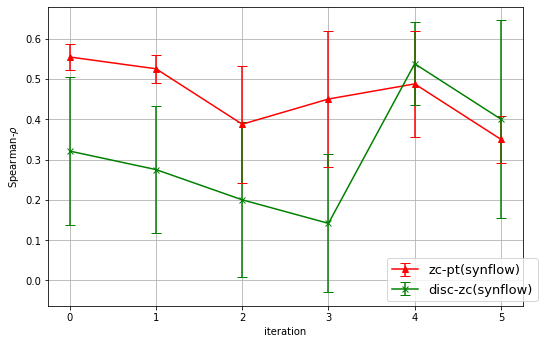

In [288]:
import matplotlib.pyplot as plt
import random
import statistics as stat
import itertools
marker = itertools.cycle(('^', 'x', 'o', 's', '*', '+')) 
color = itertools.cycle(('r', 'g', 'b', 'c', 'y', 'm')) 
plt.figure(figsize=(8.5,5.5))
x = np.array([0, 1, 2, 3, 4, 5])
for k,v in correl_seeds.items():
    mline = [] 
    err = []
    for i in range(len(v[0])):
        mline.append(stat.mean([x[i] for x in v]))
        if len(v) == 1:
            err.append(0)
        else:
            err.append(stat.stdev([x[i] for x in v]))
    #print(v)
    #print(mline)
    plt.errorbar(x, mline, err, marker=next(marker),label=k, color=next(color),capsize=5.0)
    #plt.plot(v,label=k, color=color)
plt.xlabel('iteration')
plt.ylabel('Spearman-$\\rho$')
plt.legend(bbox_to_anchor=(0.7, 0.18), prop={'size': 13})
plt.grid()
plt.savefig(pathlib.Path('op_correl_time_synflow').with_suffix('.pdf'), bbox_inches='tight')
plt.show()

In [ ]:
!pwd

In [228]:
disc_acc_raw_s1 = {100: {0: {0: 83.267998,
           1: 82.239998,
           2: 64.995995,
           3: 71.755997,
           4: 54.307999},
       1: {0: 84.935997,
           1: 83.231995,
           2: 73.231995,
           3: 76.771996,
           4: 83.451996},
       2: {0: 83.867996,
           1: 83.727997,
           2: 77.332001,
           3: 76.832001,
           4: 83.251999},
       3: {0: 65.767998,
           1: 84.444,
           2: 75.816002,
           3: 78.68,
           4: 62.703999},
       4: {0: 83.571999,
           1: 82.028,
           2: 75.023994,
           3: 76.087997,
           4: 82.563995},
       5: {0: 83.947998,
           1: 82.447998,
           2: 66.692001,
           3: 71.363998,
           4: 80.311996}},
 105: {1: {0: 81.568001,
           1: 80.867996,
           2: 63.287998,
           3: 68.956001,
           4: 79.568001},
       2: {0: 83.264,
           1: 83.900002,
           2: 83.091995,
           3: 83.507996,
           4: 83.231995},
       3: {0: 65.103996,
           1: 82.327995,
           2: 61.32,
           3: 70.596001,
           4: 79.484001},
       4: {0: 83.587997,
           1: 83.251999,
           2: 83.947998,
           3: 83.243996,
           4: 83.916},
       5: {0: 82.051994,
           1: 80.687996,
           2: 65.776001,
           3: 72.795998,
           4: 78.671997}},
 110: {2: {0: 82.907997,
           1: 82.255997,
           2: 82.551994,
           3: 82.136002,
           4: 82.339996},
       3: {0: 10.084,
           1: 61.68,
           2: 61.051998,
           3: 62.375999,
           4: 42.952},
       4: {0: 82.103996,
           1: 81.891998,
           2: 82.423996,
           3: 82.431999,
           4: 82.723999},
       5: {0: 82.563995,
           1: 82.019997,
           2: 81.739998,
           3: 82.459999,
           4: 82.327995}},
 115: {3: {0: 10.084,
           1: 62.743999,
           2: 60.143997,
           3: 64.223999,
           4: 43.596001},
       4: {0: 82.556,
           1: 81.959999,
           2: 82.199997,
           3: 81.944,
           4: 82.556},
       5: {0: 81.5,
           1: 82.192001,
           2: 82.515999,
           3: 82.911995,
           4: 82.307999}},
 120: {4: {0: 71.068001,
           1: 72.563995,
           2: 72.911995,
           3: 72.860001,
           4: 71.192001},
       5: {0: 72.295998,
           1: 71.995995,
           2: 72.515999,
           3: 72.327995,
           4: 72.203995}},
 125: {5: {0: 75.403999,
           1: 75.723999,
           2: 76.099998,
           3: 75.951996,
           4: 76.051994}}}

disc_acc_raw_s0 = {100: {0: {0: 83.647995,
           1: 81.751999,
           2: 63.887997,
           3: 71.451996,
           4: 78.32},
       1: {0: 84.984001,
           1: 83.519997,
           2: 73.692001,
           3: 72.860001,
           4: 84.823997},
       2: {0: 83.403999,
           1: 83.323997,
           2: 75.007996,
           3: 73.739998,
           4: 82.587997},
       3: {0: 71.811996,
           1: 83.479996,
           2: 67.495995,
           3: 77.711998,
           4: 60.283997},
       4: {0: 85.311996,
           1: 83.164001,
           2: 73.040001,
           3: 76.495995,
           4: 83.267998},
       5: {0: 83.612,
           1: 82.155998,
           2: 72.755997,
           3: 72.832001,
           4: 79.963997}},
 105: {1: {0: 81.304001,
           1: 81.811996,
           2: 64.323997,
           3: 66.552002,
           4: 79.675995},
       2: {0: 84.208,
           1: 84.431999,
           2: 84.307999,
           3: 83.720001,
           4: 83.928001},
       3: {0: 63.119999,
           1: 83.159996,
           2: 61.039997,
           3: 74.528,
           4: 77.367996},
       4: {0: 83.575996,
           1: 83.907997,
           2: 84.307999,
           3: 83.799995,
           4: 84.283997},
       5: {0: 81.975998,
           1: 81.251999,
           2: 62.236,
           3: 71.835999,
           4: 79.103996}},
 110: {2: {0: 81.367996,
           1: 82.043999,
           2: 81.967995,
           3: 80.767998,
           4: 82.687996},
       3: {0: 67.028,
           1: 79.287994,
           2: 61.599998,
           3: 77.040001,
           4: 55.607998},
       4: {0: 80.547997,
           1: 81.795998,
           2: 80.075996,
           3: 82.019997,
           4: 82.556},
       5: {0: 82.115997,
           1: 79.435997,
           2: 60.523998,
           3: 69.851997,
           4: 77.348}},
 115: {3: {0: 70.171997,
           1: 77.827995,
           2: 61.208,
           3: 72.416,
           4: 57.087997},
       4: {0: 81.827995,
           1: 81.279999,
           2: 82.271996,
           3: 81.551994,
           4: 82.259995},
       5: {0: 82.164001,
           1: 80.063995,
           2: 62.076,
           3: 68.720001,
           4: 78.159996}},
 120: {4: {0: 80.736,
           1: 78.447998,
           2: 80.195999,
           3: 78.848,
           4: 80.495995},
       5: {0: 61.695999,
           1: 45.815998,
           2: 60.891998,
           3: 77.003998,
           4: 35.896}},
 125: {5: {0: 61.335999,
           1: 46.503998,
           2: 59.327999,
           3: 76.215996,
           4: 34.700001}}}
disc_acc_raw_s2 = {100: {0: {0: 83.967995,
           1: 81.947998,
           2: 65.519997,
           3: 69.979996,
           4: 79.667999},
       1: {0: 84.411995,
           1: 83.043999,
           2: 66.131996,
           3: 79.047997,
           4: 83.759995},
       2: {0: 83.343994,
           1: 83.236,
           2: 79.332001,
           3: 79.259995,
           4: 84.075996},
       3: {0: 65.292,
           1: 84.203995,
           2: 77.231995,
           3: 80.631996,
           4: 53.559998},
       4: {0: 84.091995,
           1: 82.879997,
           2: 77.568001,
           3: 79.855995,
           4: 83.351997},
       5: {0: 83.963997,
           1: 81.355995,
           2: 69.187996,
           3: 75.580002,
           4: 80.783997}},
 105: {1: {0: 81.183998,
           1: 81.407997,
           2: 64.503998,
           3: 69.040001,
           4: 78.515999},
       2: {0: 83.907997,
           1: 83.279999,
           2: 84.051994,
           3: 83.484001,
           4: 83.863998},
       3: {0: 65.159996,
           1: 82.755997,
           2: 63.699997,
           3: 78.203995,
           4: 79.895996},
       4: {0: 84.211998,
           1: 84.323997,
           2: 84.315994,
           3: 84.379997,
           4: 84.208},
       5: {0: 80.900002,
           1: 81.103996,
           2: 65.068001,
           3: 72.028,
           4: 78.587997}},
 110: {2: {0: 82.599998,
           1: 82.584,
           2: 81.991997,
           3: 82.292,
           4: 82.631996},
       3: {0: 68.531998,
           1: 78.323997,
           2: 64.059998,
           3: 79.231995,
           4: 70.063995},
       4: {0: 82.159996,
           1: 81.183998,
           2: 82.155998,
           3: 82.559998,
           4: 82.155998},
       5: {0: 80.995995,
           1: 79.736,
           2: 63.264,
           3: 70.895996,
           4: 78.543999}},
 115: {3: {0: 73.103996,
           1: 78.596001,
           2: 63.607998,
           3: 80.512001,
           4: 60.699997},
       4: {0: 81.515999,
           1: 82.615997,
           2: 81.155998,
           3: 82.195999,
           4: 82.467995},
       5: {0: 81.647995,
           1: 80.276001,
           2: 63.188,
           3: 70.543999,
           4: 78.619995}},
 120: {4: {0: 82.664001,
           1: 82.687996,
           2: 82.547997,
           3: 82.608002,
           4: 82.695999},
       5: {0: 79.383995,
           1: 82.528,
           2: 69.895996,
           3: 68.995995,
           4: 80.755997}},
 125: {5: {0: 80.372002,
           1: 83.655998,
           2: 68.236,
           3: 69.288002,
           4: 82.003998}}}
disc_acc_raw_s3 = {100: {0: {0: 83.743996,
           1: 81.891998,
           2: 64.519997,
           3: 71.683998,
           4: 55.023998},
       1: {0: 85.231995,
           1: 84.031998,
           2: 74.951996,
           3: 76.248001,
           4: 80.835999},
       2: {0: 84.804001,
           1: 83.507996,
           2: 79.519997,
           3: 78.711998,
           4: 84.063995},
       3: {0: 75.248001,
           1: 83.643997,
           2: 76.671997,
           3: 75.779999,
           4: 83.18},
       4: {0: 84.047997,
           1: 82.711998,
           2: 79.815994,
           3: 77.484001,
           4: 83.807999},
       5: {0: 85.220001,
           1: 81.624001,
           2: 71.127998,
           3: 77.391998,
           4: 81.519997}},
 105: {1: {0: 82.315994,
           1: 81.619995,
           2: 63.607998,
           3: 71.279999,
           4: 79.627998},
       2: {0: 83.959999,
           1: 83.792,
           2: 84.087997,
           3: 84.467995,
           4: 84.568001},
       3: {0: 64.563995,
           1: 83.171997,
           2: 64.127998,
           3: 75.447998,
           4: 80.547997},
       4: {0: 84.096001,
           1: 84.279999,
           2: 84.547997,
           3: 84.799995,
           4: 83.515999},
       5: {0: 81.975998,
           1: 81.283997,
           2: 66.223999,
           3: 73.743996,
           4: 79.136002}},
 110: {2: {0: 82.276001,
           1: 81.860001,
           2: 82.299995,
           3: 82.139999,
           4: 81.751999},
       3: {0: 10.084,
           1: 60.967999,
           2: 60.216,
           3: 67.484001,
           4: 42.851997},
       4: {0: 81.720001,
           1: 81.931999,
           2: 82.776001,
           3: 82.559998,
           4: 82.720001},
       5: {0: 82.279999,
           1: 82.040001,
           2: 82.183998,
           3: 81.540001,
           4: 82.0}},
 115: {3: {0: 10.084,
           1: 60.556,
           2: 57.475998,
           3: 66.759995,
           4: 42.584},
       4: {0: 82.339996,
           1: 81.495995,
           2: 82.403999,
           3: 82.327995,
           4: 82.872002},
       5: {0: 82.360001,
           1: 83.152,
           2: 83.051994,
           3: 81.367996,
           4: 83.096001}},
 120: {4: {0: 74.167999,
           1: 74.056,
           2: 74.075996,
           3: 73.584,
           4: 74.195999},
       5: {0: 74.139999,
           1: 72.283997,
           2: 73.528,
           3: 73.507996,
           4: 73.751999}},
 125: {5: {0: 76.584,
           1: 76.215996,
           2: 75.783997,
           3: 76.444,
           4: 76.835999}}}

In [229]:
disc_acc_raw_25_s0 = {100: {0: {0: 83.855995,
           1: 82.695999,
           2: 79.720001,
           3: 81.667999,
           4: 84.287994},
       1: {0: 84.815994,
           1: 84.956001,
           2: 83.720001,
           3: 81.827995,
           4: 84.540001},
       2: {0: 85.5,
           1: 85.619995,
           2: 84.0,
           3: 83.512001,
           4: 84.403999},
       3: {0: 84.255997,
           1: 83.951996,
           2: 82.647995,
           3: 83.731995,
           4: 83.127998},
       4: {0: 84.159996,
           1: 83.827995,
           2: 84.339996,
           3: 83.579994,
           4: 83.563995},
       5: {0: 82.671997,
           1: 84.568001,
           2: 83.659996,
           3: 82.523994,
           4: 83.372002}},
 125: {1: {0: 83.423996,
           1: 84.323997,
           2: 83.431999,
           3: 83.031998,
           4: 82.916},
       2: {0: 83.416,
           1: 84.731995,
           2: 82.028,
           3: 81.963997,
           4: 82.584},
       3: {0: 81.687996,
           1: 82.167999,
           2: 80.655998,
           3: 83.416,
           4: 81.512001},
       4: {0: 84.363998,
           1: 83.771996,
           2: 75.963997,
           3: 79.195999,
           4: 83.951996},
       5: {0: 82.551994,
           1: 82.963997,
           2: 83.531998,
           3: 84.075996,
           4: 83.491997}},
 150: {2: {0: 82.203995,
           1: 82.059998,
           2: 83.167999,
           3: 82.348,
           4: 82.335999},
       3: {0: 79.603996,
           1: 82.664001,
           2: 74.519997,
           3: 84.311996,
           4: 71.652},
       4: {0: 81.916,
           1: 80.695999,
           2: 73.900002,
           3: 76.916,
           4: 82.907997},
       5: {0: 82.208,
           1: 82.203995,
           2: 81.276001,
           3: 84.187996,
           4: 80.255997}},
 175: {3: {0: 68.047997,
           1: 81.315994,
           2: 80.087997,
           3: 83.928001,
           4: 74.515999},
       4: {0: 83.931999,
           1: 82.547997,
           2: 78.699997,
           3: 80.556,
           4: 81.195999},
       5: {0: 82.323997,
           1: 79.639999,
           2: 80.259995,
           3: 84.040001,
           4: 66.335999}},
 200: {4: {0: 85.295998,
           1: 83.995995,
           2: 84.579994,
           3: 84.979996,
           4: 83.872002},
       5: {0: 84.279999,
           1: 83.931999,
           2: 84.944,
           3: 84.903999,
           4: 83.075996}},
 225: {5: {0: 84.407997,
           1: 85.540001,
           2: 79.779999,
           3: 79.087997,
           4: 85.0}}}

disc_acc_raw_25_s1 = {100: {0: {0: 82.655998,
           1: 83.664001,
           2: 80.556,
           3: 81.687996,
           4: 83.935997},
       1: {0: 83.931999,
           1: 83.835999,
           2: 82.991997,
           3: 82.664001,
           4: 84.152},
       2: {0: 84.779999,
           1: 84.991997,
           2: 84.655998,
           3: 84.127998,
           4: 84.751999},
       3: {0: 85.18,
           1: 84.171997,
           2: 83.807999,
           3: 83.795998,
           4: 84.543999},
       4: {0: 84.019997,
           1: 84.931999,
           2: 84.075996,
           3: 84.456001,
           4: 84.879997},
       5: {0: 83.459999,
           1: 83.487999,
           2: 81.332001,
           3: 83.475998,
           4: 82.699997}},
 125: {1: {0: 82.403999,
           1: 84.360001,
           2: 83.299995,
           3: 84.543999,
           4: 83.467995},
       2: {0: 83.995995,
           1: 83.895996,
           2: 83.243996,
           3: 83.119995,
           4: 83.855995},
       3: {0: 80.575996,
           1: 84.023994,
           2: 83.299995,
           3: 83.223999,
           4: 82.187996},
       4: {0: 83.715996,
           1: 83.843994,
           2: 78.931999,
           3: 80.467995,
           4: 83.703995},
       5: {0: 80.056,
           1: 83.599998,
           2: 84.327995,
           3: 84.152,
           4: 81.447998}},
 150: {2: {0: 83.203995,
           1: 83.531998,
           2: 84.991997,
           3: 84.956001,
           4: 83.615997},
       3: {0: 84.428001,
           1: 83.416,
           2: 81.451996,
           3: 85.040001,
           4: 83.031998},
       4: {0: 84.711998,
           1: 83.323997,
           2: 80.68,
           3: 81.551994,
           4: 82.451996},
       5: {0: 82.631996,
           1: 83.243996,
           2: 83.959999,
           3: 83.187996,
           4: 81.779999}},
 175: {3: {0: 82.523994,
           1: 83.208,
           2: 82.664001,
           3: 81.875999,
           4: 82.639999},
       4: {0: 85.119995,
           1: 83.276001,
           2: 79.472,
           3: 79.776001,
           4: 82.431999},
       5: {0: 81.248001,
           1: 83.956001,
           2: 80.047997,
           3: 80.519997,
           4: 81.916}},
 200: {4: {0: 85.147995,
           1: 80.743996,
           2: 77.528,
           3: 76.159996,
           4: 81.956001},
       5: {0: 70.891998,
           1: 84.192001,
           2: 74.743996,
           3: 78.667999,
           4: 81.068001}},
 225: {5: {0: 71.748001,
           1: 85.199997,
           2: 79.939995,
           3: 80.844002,
           4: 83.327995}}}

disc_acc_raw_25_s2 = {100: {0: {0: 84.155998,
           1: 83.139999,
           2: 80.32,
           3: 81.071999,
           4: 83.335999},
       1: {0: 83.112,
           1: 84.755997,
           2: 82.035995,
           3: 83.348,
           4: 85.131996},
       2: {0: 83.655998,
           1: 84.715996,
           2: 84.456001,
           3: 83.599998,
           4: 85.435997},
       3: {0: 84.447998,
           1: 84.407997,
           2: 84.32,
           3: 82.531998,
           4: 83.119995},
       4: {0: 84.779999,
           1: 84.208,
           2: 83.947998,
           3: 84.155998,
           4: 84.351997},
       5: {0: 82.963997,
           1: 83.535995,
           2: 83.236,
           3: 82.835999,
           4: 83.659996}},
 125: {1: {0: 82.047997,
           1: 83.411995,
           2: 79.451996,
           3: 81.183998,
           4: 81.619995},
       2: {0: 80.655998,
           1: 81.283997,
           2: 83.655998,
           3: 83.012001,
           4: 81.764},
       3: {0: 78.895996,
           1: 80.419998,
           2: 77.379997,
           3: 84.607994,
           4: 82.304001},
       4: {0: 82.711998,
           1: 82.411995,
           2: 84.615997,
           3: 84.375999,
           4: 82.419998},
       5: {0: 83.739998,
           1: 83.315994,
           2: 80.407997,
           3: 82.056,
           4: 81.931999}},
 150: {2: {0: 80.991997,
           1: 82.5,
           2: 82.615997,
           3: 83.335999,
           4: 81.311996},
       3: {0: 81.444,
           1: 81.639999,
           2: 76.804001,
           3: 82.851997,
           4: 74.995995},
       4: {0: 81.556,
           1: 82.723999,
           2: 82.559998,
           3: 82.043999,
           4: 82.872002},
       5: {0: 83.203995,
           1: 83.407997,
           2: 78.903999,
           3: 81.979996,
           4: 82.68}},
 175: {3: {0: 82.895996,
           1: 81.023994,
           2: 76.164001,
           3: 84.195999,
           4: 69.591995},
       4: {0: 81.379997,
           1: 83.259995,
           2: 82.164001,
           3: 81.931999,
           4: 82.171997},
       5: {0: 82.343994,
           1: 82.103996,
           2: 78.223999,
           3: 80.112,
           4: 82.271996}},
 200: {4: {0: 85.112,
           1: 85.568001,
           2: 85.243996,
           3: 85.227997,
           4: 85.311996},
       5: {0: 83.307999,
           1: 85.136002,
           2: 80.503998,
           3: 80.467995,
           4: 84.827995}},
 225: {5: {0: 81.231995,
           1: 85.307999,
           2: 80.127998,
           3: 80.951996,
           4: 84.759995}}}

disc_acc_raw_25_s3 = {100: {0: {0: 84.271996,
           1: 84.523994,
           2: 79.667999,
           3: 81.900002,
           4: 83.823997},
       1: {0: 83.959999,
           1: 84.292,
           2: 84.32,
           3: 83.451996,
           4: 84.299995},
       2: {0: 83.68,
           1: 84.764,
           2: 84.587997,
           3: 84.112,
           4: 85.339996},
       3: {0: 82.779999,
           1: 83.811996,
           2: 83.832001,
           3: 83.783997,
           4: 83.832001},
       4: {0: 84.579994,
           1: 84.587997,
           2: 84.843994,
           3: 84.096001,
           4: 83.715996},
       5: {0: 85.075996,
           1: 84.304001,
           2: 83.287994,
           3: 83.823997,
           4: 84.559998}},
 125: {1: {0: 84.068001,
           1: 81.540001,
           2: 83.783997,
           3: 84.643997,
           4: 84.659996},
       2: {0: 84.147995,
           1: 83.220001,
           2: 84.043999,
           3: 84.531998,
           4: 84.32},
       3: {0: 84.0,
           1: 83.967995,
           2: 83.391998,
           3: 84.287994,
           4: 83.591995},
       4: {0: 84.304001,
           1: 83.227997,
           2: 82.056,
           3: 83.379997,
           4: 83.547997},
       5: {0: 82.888,
           1: 82.612,
           2: 84.731995,
           3: 83.815994,
           4: -1}},
 150: {2: {0: 83.32,
           1: 83.675995,
           2: 83.692001,
           3: 84.423996,
           4: 84.164001},
       3: {0: 84.875999,
           1: 84.195999,
           2: 82.068001,
           3: 83.764,
           4: 84.107994},
       4: {0: 83.075996,
           1: 83.879997,
           2: 79.683998,
           3: 83.096001,
           4: 83.923996},
       5: {0: 83.139999,
           1: 67.435997,
           2: 82.984001,
           3: 83.519997,
           4: 65.540001}},
 175: {3: {0: 85.287994,
           1: 83.584,
           2: 80.624001,
           3: 83.587997,
           4: 82.695999},
       4: {0: 85.843994,
           1: 83.767998,
           2: 80.612,
           3: 81.928001,
           4: 82.720001},
       5: {0: 82.063995,
           1: 63.295998,
           2: 83.523994,
           3: 83.175995,
           4: 64.627998}},
 200: {4: {0: 78.456001,
           1: 84.727997,
           2: 75.619995,
           3: 76.295998,
           4: 84.159996},
       5: {0: 82.444,
           1: 82.367996,
           2: 80.323997,
           3: 81.431999,
           4: 69.383995}},
 225: {5: {0: 72.18,
           1: 77.375999,
           2: 80.659996,
           3: 80.944,
           4: 63.379997}}}

In [ ]:
 225: {5: {0: 72.18, 2
           1: 77.375999, 3
           2: 80.659996, 4
           3: 80.944, 5
           4: 63.379997}}} 1

In [ ]:
 225: {5: {0: 81.231995, 3
           1: 85.307999, 5
           2: 80.127998, 1
           3: 80.951996, 2 
           4: 84.759995}}} 4

In [ ]:
 225: {5: {0: 71.748001, 1
           1: 85.199997, 5
           2: 79.939995, 2
           3: 80.844002, 3
           4: 83.327995}}} 4

In [ ]:
 225: {5: {0: 84.407997,
           1: 85.540001,
           2: 79.779999,
           3: 79.087997,
           4: 85.0}}}

In [ ]:
darts-pt 0 5 6 0.46666666666666656
darts-pt 1 4 5 0.45999999999999996
darts-pt 2 3 4 0.44999999999999996
darts-pt 3 2 3 0.3333333333333333
darts-pt 4 1 2 0.25
darts-pt 5 0 1 0.6
darts-pt 0 5 6 0.4333333333333333
darts-pt 1 4 5 0.43999999999999995
darts-pt 2 3 4 0.5249999999999999
darts-pt 3 2 3 0.4333333333333333
darts-pt 4 1 2 0.25
darts-pt 5 0 1 0.6
darts-pt 0 5 6 0.3833333333333333
darts-pt 1 4 5 0.36
darts-pt 2 3 4 0.475
darts-pt 3 2 3 0.26666666666666666
darts-pt 4 1 2 0.19999999999999998
darts-pt 5 0 1 0.6
darts-pt 0 5 6 0.4333333333333333
darts-pt 1 4 5 0.45999999999999996
darts-pt 2 3 4 0.44999999999999996
darts-pt 3 2 3 0.25476269788227823
darts-pt 4 1 2 0.25
darts-pt 5 0 1 0.6
zc-pt 0 5 6 0.7333333333333333
zc-pt 1 4 5 0.6599999999999999
zc-pt 2 3 4 0.8249999999999998
zc-pt 3 2 3 0.5333333333333333
zc-pt 4 1 2 0.6499999999999999
zc-pt 5 0 1 0.7999999999999999
zc-pt 0 5 6 0.7666666666666665
zc-pt 1 4 5 0.7
zc-pt 2 3 4 0.6749999999999998
zc-pt 3 2 3 0.5333333333333333
zc-pt 4 1 2 0.6499999999999999
zc-pt 5 0 1 0.6
zc-pt 0 5 6 0.75
zc-pt 1 4 5 0.7
zc-pt 2 3 4 0.5999999999999999
zc-pt 3 2 3 0.6
zc-pt 4 1 2 0.7499999999999999
zc-pt 5 0 1 0.6
zc-pt 0 5 6 0.7833333333333332
zc-pt 1 4 5 0.7599999999999999
zc-pt 2 3 4 0.7999999999999999
zc-pt 3 2 3 0.7999999999999998
zc-pt 4 1 2 0.8999999999999998
zc-pt 5 0 1 0.7999999999999999
disc-zc 0 5 6 0.24999999999999997
disc-zc 1 4 5 0.23999999999999994
disc-zc 2 3 4 0.02500000000000001
disc-zc 3 2 3 0.06666666666666667
disc-zc 4 1 2 0.39999999999999997
disc-zc 5 0 1 0.19999999999999998
disc-zc 0 5 6 0.06666666666666664
disc-zc 1 4 5 0.13999999999999996
disc-zc 2 3 4 0.175
disc-zc 3 2 3 -0.06666666666666664
disc-zc 4 1 2 0.19999999999999998
disc-zc 5 0 1 0.7
disc-zc 0 5 6 0.36666666666666664
disc-zc 1 4 5 0.47999999999999987
disc-zc 2 3 4 0.19999999999999996
disc-zc 3 2 3 -0.06666666666666668
disc-zc 4 1 2 0.3
disc-zc 5 0 1 0.6
disc-zc 0 5 6 0.4333333333333333
disc-zc 1 4 5 0.5599999999999998
disc-zc 2 3 4 0.3499999999999999
disc-zc 3 2 3 0.16666666666666666
disc-zc 4 1 2 0.5
disc-zc 5 0 1 0.7
disc-acc 0 5 6 -0.16666666666666666
disc-acc 1 4 5 0.07999999999999999
disc-acc 2 3 4 0.15
disc-acc 3 2 3 -0.06666666666666668
disc-acc 4 1 2 0.6499999999999999
disc-acc 5 0 1 -0.49999999999999994
disc-acc 0 5 6 -0.5
disc-acc 1 4 5 -2.2204460492503132e-17
disc-acc 2 3 4 0.32499999999999996
disc-acc 3 2 3 -0.3333333333333333
disc-acc 4 1 2 -0.25
disc-acc 5 0 1 0.09999999999999999
disc-acc 0 5 6 -0.38333333333333336
disc-acc 1 4 5 0.019999999999999973
disc-acc 2 3 4 0.07499999999999993
disc-acc 3 2 3 -0.36666666666666664
disc-acc 4 1 2 -0.6
disc-acc 5 0 1 -0.6
disc-acc 0 5 6 -0.4944809881425583
disc-acc 1 4 5 0.21999999999999997
disc-acc 2 3 4 0.15
disc-acc 3 2 3 0.19999999999999998
disc-acc 4 1 2 -0.6499999999999999
disc-acc 5 0 1 0.7999999999999999